**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Manual Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Redo outliers check](#redo-outliers)

* [10. Feature Selection](#FeatureSelection)
    * [10.1. Univariate Analysis](#univariate)
    * [10.2. Filter Methods](#filter)
        * [10.2.1 Correlation Matrix](#correlation)
        * [10.2.2 Chi-Squared](#chi-squared)
        * [10.2.3 ANOVA](#ANOVA)
    * [10.3. Wrapper methods](#warpper)
        * [10.3.1 RFE](#RFE)
        * [10.3.2 Forward Sequential Feature Selection](#forward)
        * [10.3.3 Backward Sequential Feature Selection](#backward)
    * [10.4. Embedded methods](#embedded)
        * [10.4.1 Ridge Regression](#ridge)
        * [10.4.2 Decision Tree for feature importance](#decision_tree_sel_feature)
        
* [11. Check for an imbalanced dataset](#imbalanced)
    * [11.1.  Adaptive Syntetic Oversampling](#Adaptive)
    
* [12. Modeling](#Modeling)
    * [12.1 Decision trees](#DT)
    * [12.2 Neural Network](#NN)
    * [12.3 Logistic Regression](#LR)
    * [12.4 KNN](#KNN)
    * [12.5 Support Vector Machine](#SVM)
    * [12.6 Ensemble models](#ENSEMBLE)
        * [12.6.1 Random Forest](#RF)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import datetime as dt
from matplotlib import pyplot


from numpy import mean,std
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
#from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import OrderedDict

from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install imblearn

In [4]:
!pip install metrics

In [5]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [6]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [7]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [9]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [10]:
#techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [11]:
df = df.set_index(["Access_ID"])
test = test.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [12]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")
test["Date"] = pd.to_datetime(test["Date"], format = "%d-%b-%y")

In [13]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [14]:
def conversion_type(df):

    df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
    df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())
    df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
    df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
    df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
    df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
    df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
    df['OS']=df['OS'].astype(pd.StringDtype())
    df['Browser']=df['Browser'].astype(pd.Int32Dtype())
    df['Country']=df['Country'].astype(pd.StringDtype())
    df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
    df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
    


In [15]:
conversion_type(df)
conversion_type(test)
df['Buy']=df['Buy'].astype(pd.Int32Dtype())

In [16]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [17]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

,min,max
Date,,
2,1,29
3,1,31
5,1,31
6,1,30
7,1,31
8,1,31
9,1,30
10,1,31
11,1,30


In [18]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
104650368,2020-11-05,1,0.0,0,0.0,14,1125.875,0.0,0.0429,0.0,Windows,2,Portugal,2,Returner,0,5
107375098,2020-08-07,1,0.0,3,69.0,15,352.875,0.0,0.0556,0.0,Windows,2,Spain,2,Returner,0,7
113677580,2020-11-28,1,0.0,0,0.0,39,1159.541748,0.0013,0.0313,0.0,Windows,2,Other,2,Returner,1,28
115628954,2020-05-23,2,0.0,0,0.0,0,0.0,0.2,0.2,0.0,Android,2,Portugal,6,Returner,0,23
116343256,2020-10-11,1,0.0,1,66.400002,14,668.316711,0.0143,0.0286,44.893501,iOS,2,Portugal,15,Returner,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776479996,2020-06-26,1,0.0,0,0.0,12,277.450012,0.06,0.09,0.0,MacOSX,2,Spain,13,Returner,0,26
776570163,2020-05-25,1,0.0,0,0.0,27,889.0,0.0214,0.0679,0.0,iOS,1,Spain,3,Returner,0,25
778884123,2020-05-26,1,0.0,0,0.0,90,5621.599121,0.0,0.0131,2.099,Windows,2,Italy,2,Returner,0,26


In [19]:
df=df[~(
    
        ((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
        ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
        ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
        ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
        ((df['Product_Pages']==0) & (df['Product_Duration']>0))|
        ((df['Product_Pages']>0) & (df['Product_Duration']==0))|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|

        (df['GoogleAnalytics_ExitRate']>1)|
        (df['GoogleAnalytics_ExitRate']<0)|
        (df['GoogleAnalytics_BounceRate']>1)|
        (df['GoogleAnalytics_BounceRate']<0)|
        (df['Date']>dt.datetime(2020,12,31))|
        (df['Date']<dt.datetime(2020,1,31))
    
        )]

In [20]:
df[df['Date']>dt.datetime(2020,1,31)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [21]:
# percentage of records removed due to inconsistency
(9999-9710)/9999

0.028902890289028902

<hr>
<a class="anchor" id="Split">
    
# 2. Split the data
    
</a>

In [22]:
X = df.drop("Buy", axis = 1)
y = df["Buy"]

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify = y, train_size = 0.70,random_state = 0, shuffle = True)

### Separate Numerical from Categorical 

In [24]:
# X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
# X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
# #For validation
# X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
# X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

In [25]:
non_num_feat=['Date', 'OS', 'Country', 'Type_of_Traffic', 'Type_of_Visitor', 'day','Browser']
X_train_num = X_train.drop(columns=non_num_feat)
X_train_cat=X_train[non_num_feat]

X_val_num = X_val.drop(columns=non_num_feat)
X_val_cat=X_val[non_num_feat]

<hr>
<a class="anchor" id="outliers">
    
# 2. Outliers Treatment
    
</a>

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped ___ records (1.3%).

<hr>
<a class="anchor" id="AutomaticLimitation">
    
## Manual Limitation
    
</a>

Text(0.5, 0.98, "Numeric Variables' Histograms")

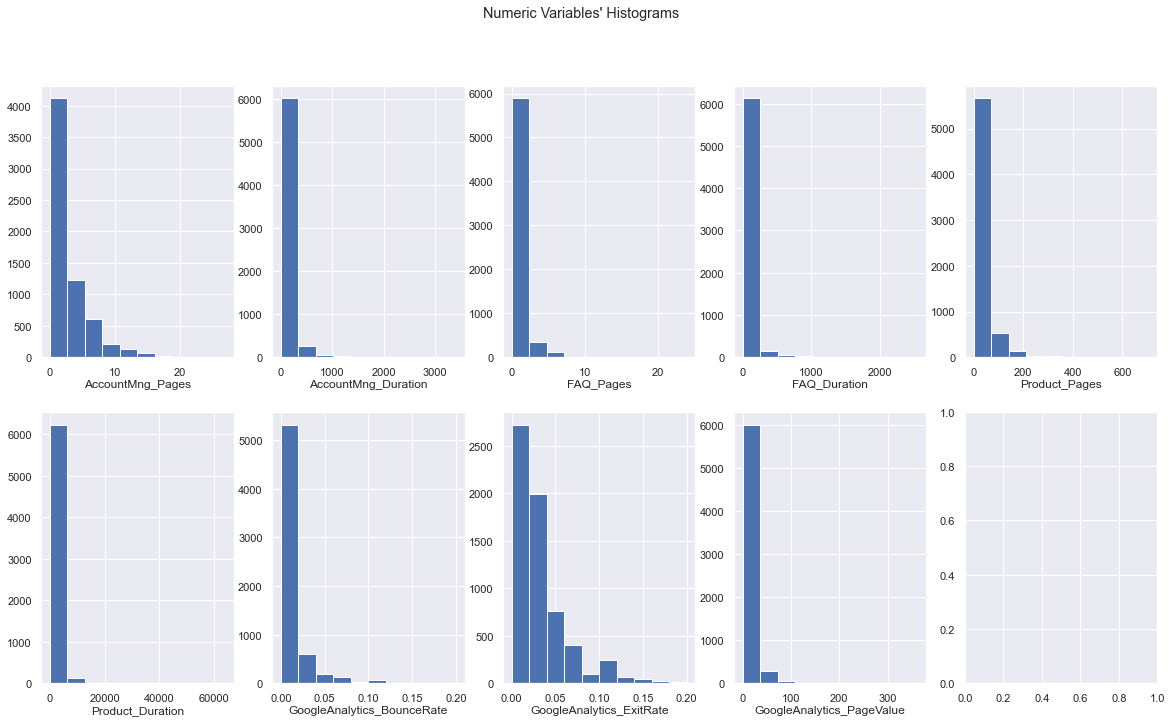

In [26]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), (X_train_num.columns.tolist())): # Notice the zip() function and flatten() method
    ax.hist(X_train_num[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig("teste.png")

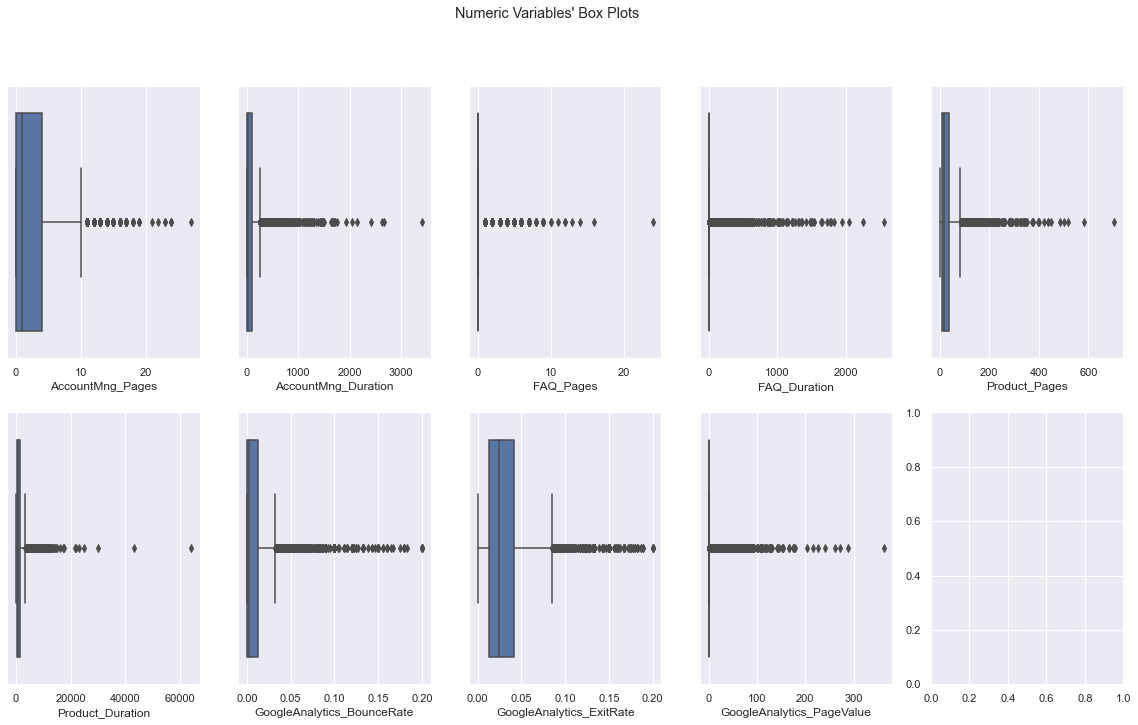

In [27]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_num.columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_num.columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [28]:
(6797-6708)/6797 

0.013094012064145948

In [29]:
len(X_train)

6385

In [30]:
filters1 = (
         (X_train['AccountMng_Pages']<=19)
         &
         (X_train['AccountMng_Duration']<=2000)
         &
         (X_train['FAQ_Pages']<=6)
         &
         (X_train['FAQ_Duration']<=1100)
         &
         (X_train['Product_Pages']<=400)
         &
         (X_train['Product_Duration']<=15000)
         &
         (X_train['GoogleAnalytics_BounceRate']<=0.20)
         &
         (X_train['GoogleAnalytics_ExitRate']<=0.20)
         &
         (X_train['GoogleAnalytics_PageValue']<=165)
         )

teste=X_train[filters1]
teste

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,day
Access_ID,,,,,,,,,,,,,,,,
226760264,2020-05-01,0,0.0,0,0.0,16,462.0,0.0125,0.05,0.0,Android,1,Portugal,6,Returner,1
253736966,2020-05-13,7,123.5,0,0.0,27,477.5,0.005,0.012,0.0,Windows,2,United Kingdom,4,Returner,13
228214120,2020-05-28,0,0.0,0,0.0,19,741.833313,0.0,0.0193,0.0,Windows,2,Portugal,4,Returner,28
711721495,2020-12-11,1,41.5,0,0.0,12,237.5,0.0154,0.0462,0.0,Android,8,France,1,Returner,11
672413401,2020-05-02,3,54.0,0,0.0,50,1911.333252,0.004,0.013,109.587601,Windows,2,Italy,6,Returner,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221977343,2020-07-14,7,115.727303,0,0.0,43,2660.283203,0.0306,0.0558,0.0,Windows,2,France,13,Returner,14
666606381,2020-05-12,0,0.0,0,0.0,10,611.0,0.02,0.06,0.0,Windows,4,Spain,1,Returner,12
168495558,2020-05-01,1,55.0,2,18.0,9,548.0,0.0,0.04,17.270399,Windows,4,Spain,4,Returner,1


In [31]:
#def manual_filter(df):
def filter_outlier(df):
    filters1 = (
         (df['AccountMng_Pages']<=19)
         &
         (df['AccountMng_Duration']<=2000)
         &
         (df['FAQ_Pages']<=6)
         &
         (df['FAQ_Duration']<=1100)
         &
         (df['Product_Pages']<=400)
         &
         (df['Product_Duration']<=15000)
         &
         (df['GoogleAnalytics_BounceRate']<=0.20)
         &
         (df['GoogleAnalytics_ExitRate']<=0.20)
         &
         (df['GoogleAnalytics_PageValue']<=165)
         )
    return df[filters1],df[~filters1].index

In [32]:
# X_CV=filter_outlier(X)[0]
# index_out_X_CV=filter_outlier(X)[1].tolist()
# y_CV=pd.DataFrame(y)
# y_CV=y_CV[~y_CV.index.isin(index_out_X_CV)]

In [33]:
index_out_train=filter_outlier(X_train)[1].tolist()

In [34]:
index_out_val=filter_outlier(X_val)[1].tolist()

In [35]:
X_val_no_out=filter_outlier(X_val)[0]

In [36]:
X_train_no_out=filter_outlier(X_train)[0]

In [37]:
X_train_out=X_train.copy()
X_val_out=X_val.copy()

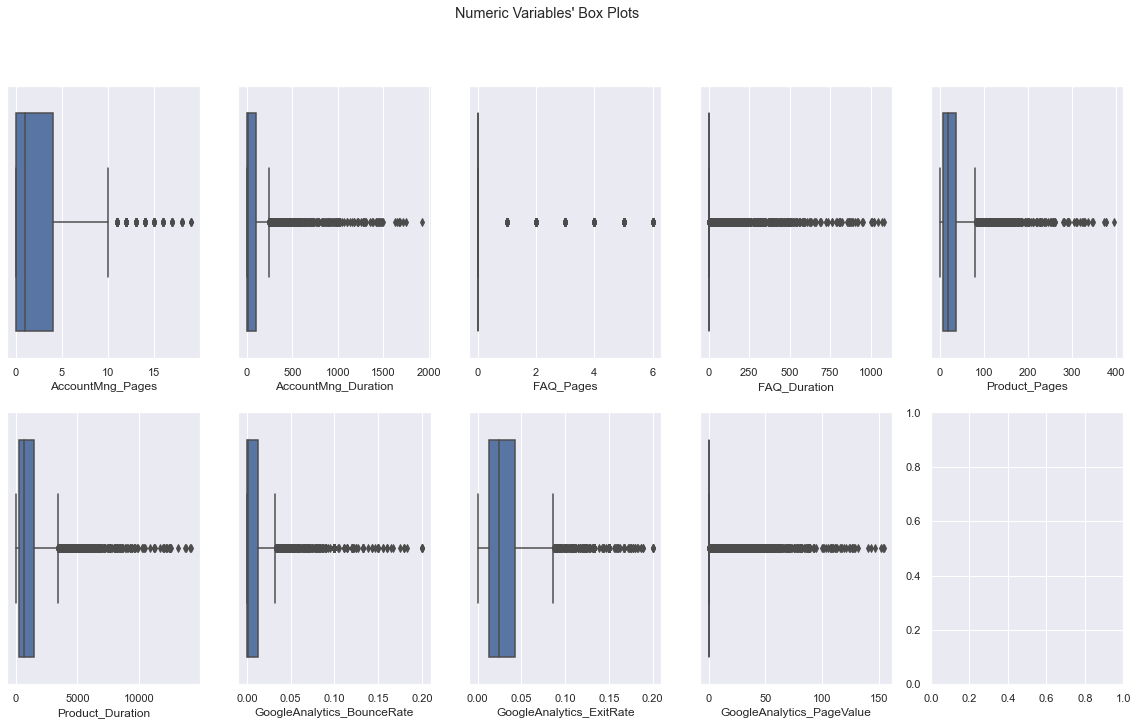

In [38]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_no_out.drop(columns=non_num_feat, axis=1).columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), teste.drop(columns=non_num_feat, axis=1).columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=(X_train_no_out[feat]), ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [39]:
# remove outliers records from y_train
y_train_df=pd.DataFrame(y_train)
y_train_df=y_train_df[~y_train_df.index.isin(index_out_train)]

In [40]:
# remove outliers records from y_val
y_val_df=pd.DataFrame(y_val)
y_val_df=y_val_df[~y_val_df.index.isin(index_out_val)]

In [41]:
X_train_no_out_num = X_train_no_out.drop(columns=non_num_feat)
X_train_no_out_cat=X_train_no_out[non_num_feat]

<hr>
<a class="anchor" id="2dim_outliers">
    
## Multi-dimentional outliers
    
</a>

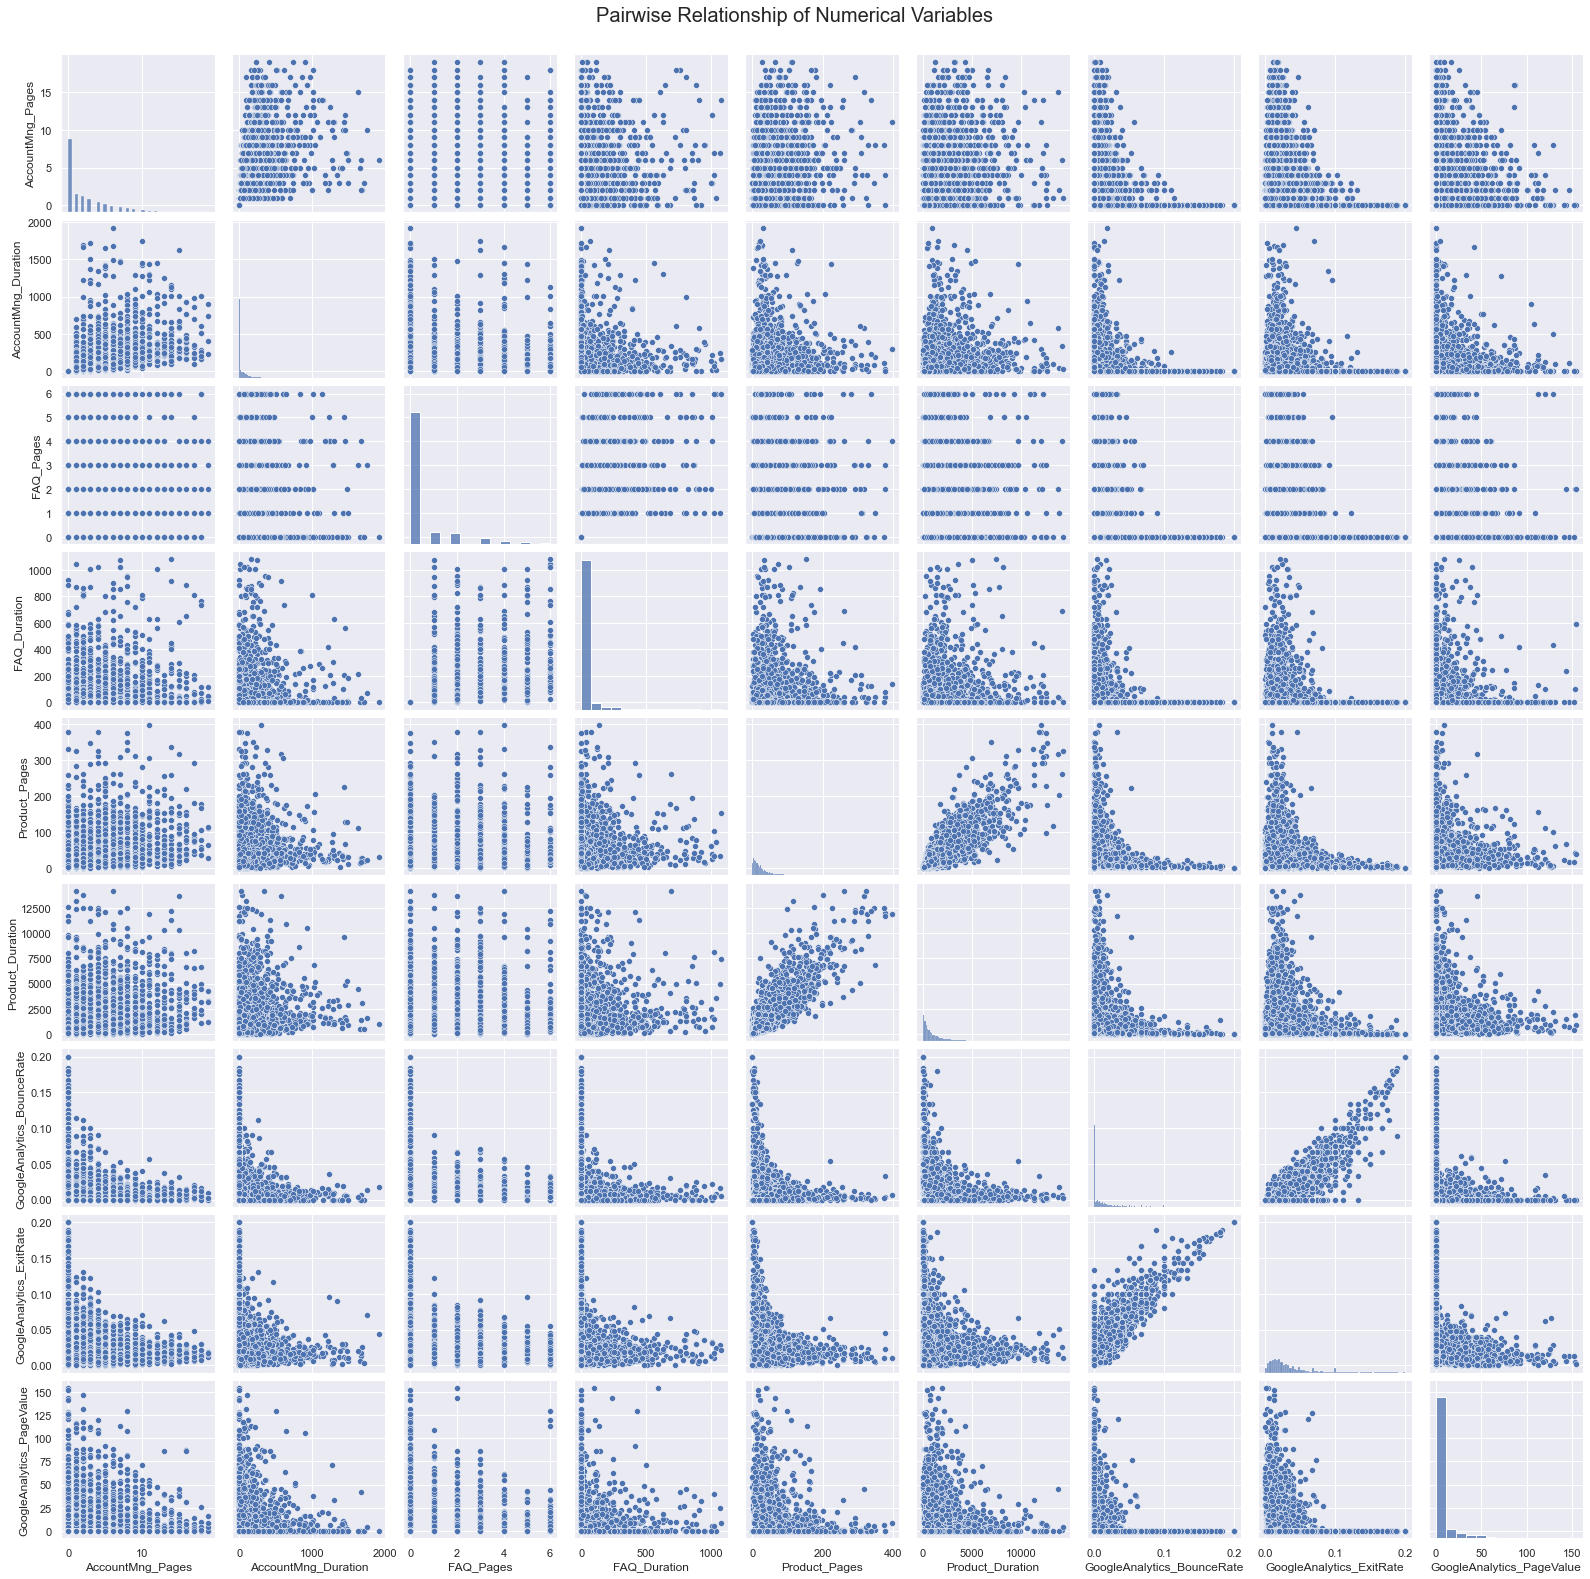

In [42]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(X_train_no_out_num, diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

<hr>
<a class="anchor" id="FeatureEngeneering">
    
# Feature Engineering
    
</a>

In [43]:
def feat_eng(df):

    df['month']=df['Date'].dt.month
    df['avg_duration_account'] = np.where(
        df['AccountMng_Pages']==0, 0,np.divide(df['AccountMng_Duration'],df['AccountMng_Pages'])) 

    df['avg_duration_FAQ'] = np.where(
        df['FAQ_Pages']==0, 0,np.divide(df['FAQ_Duration'],df['FAQ_Pages'])) 

    df['avg_duration_product'] = np.where(
        df['Product_Pages']==0, 0,np.divide(df['Product_Duration'],df['Product_Pages'])) 
   

    df['log_AccountMng_Duration']=np.log10(df['AccountMng_Duration']+1)
    df['log_AccountMng_Pages']=np.log10(df['AccountMng_Pages']+1)
    df['log_FAQ_Duration']=np.log10(df['FAQ_Duration']+1)
    df['log_FAQ_Pages']=np.log10(df['FAQ_Pages']+1)
    df['log_Product_Duration']=np.log10(df['Product_Duration']+1)
    df['log_Product_Pages']=np.log10(df['Product_Pages']+1)
    df['log_BounceRate']=np.log10(df['GoogleAnalytics_BounceRate']+1)
    df['log_ExitRate']=np.log10(df['GoogleAnalytics_ExitRate']+1)
    df['log_PageValue']=np.log10(df['GoogleAnalytics_PageValue']+1)
    df['during_covid']=np.where(df['month']<=3,0,1) 

In [44]:
feat_eng(X_train_no_out)
feat_eng(X_val_no_out)
feat_eng(test)

feat_eng(X_train_out)
feat_eng(X_val_out)
#feat_eng(X_CV)

Repeating the process for dataset with outliers

In [45]:
# feat_eng

# X_train_num_dirty = X_train_num.copy()
# X_train_cat_dirty = X_train_cat.copy()
# X_val_num_dirty = X_val_num.copy()
# X_val_cat_dirty = X_val_cat.copy()


# y_train_dirty = y_train.copy()
# y_val_dirty = y_val.copy()

## One Hot_encoding

#### Train dataset

In [46]:
ohc_feat_list = ['Browser','Country','OS','Type_of_Visitor','Type_of_Traffic']

In [47]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(X_train_no_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train = pd.DataFrame(ohc_feat, index=X_train_no_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany',
       'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS',
       'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3',
       'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11',
       'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [48]:
ohc_X_train.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [49]:
X_train_eng = X_train_no_out.join(ohc_X_train)
X_train_eng_minus1=X_train_eng.copy() #create a dataframe to test -1 and 1 minmax

In [50]:
X_train_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Oth

#### Test dataset

In [51]:
ohc_feat_test = ohc.fit_transform(test[ohc_feat_list])
ohc_feat_test_names = ohc.get_feature_names()
ohc_X_test = pd.DataFrame(ohc_feat_test, index = test.index, columns = ohc_feat_test_names)  # Why the index=df_ohc.index?
ohc_X_test.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9',
       'x0_10', 'x0_11', 'x0_12', 'x0_13', 'x1_Brazil', 'x1_France',
       'x1_Germany', 'x1_Italy', 'x1_Other', 'x1_Portugal', 'x1_Spain',
       'x1_Switzerland', 'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS',
       'x2_Fedora', 'x2_MacOSX', 'x2_Other', 'x2_Ubuntu', 'x2_Windows',
       'x2_iOS', 'x3_New_Access', 'x3_Other', 'x3_Returner', 'x4_1', 'x4_2',
       'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10',
       'x4_11', 'x4_12', 'x4_13', 'x4_14', 'x4_15'],
      dtype='object')

In [52]:
ohc_X_test.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [53]:
X_test_eng = test.join(ohc_X_test)

In [54]:
X_test_robust=X_test_eng.copy()

#### Validation dataset

In [55]:
ohc_feat_val = ohc.fit_transform(X_val_no_out[ohc_feat_list])
ohc_feat_val_names = ohc.get_feature_names()
ohc_X_val = pd.DataFrame(ohc_feat_val, index = X_val_no_out.index, columns = ohc_feat_val_names)  # Why the index=df_ohc.index?
ohc_X_val.columns

Index(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_10',
       'x0_12', 'x0_13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_MacOSX',
       'x2_Other', 'x2_Ubuntu', 'x2_Windows', 'x2_iOS', 'x3_New_Access',
       'x3_Other', 'x3_Returner', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5',
       'x4_6', 'x4_7', 'x4_8', 'x4_9', 'x4_10', 'x4_11', 'x4_12', 'x4_13',
       'x4_14', 'x4_15'],
      dtype='object')

In [56]:
ohc_X_val.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

In [57]:
X_val_eng = X_val_no_out.join(ohc_X_val)
X_val_eng_minus1=X_val_eng.copy()

In [58]:
binary_list=ohc_X_train.columns.to_list()+['during_covid']

In [59]:
non_num_feat1=non_num_feat+binary_list+['month']

In [60]:
X_train_eng_num = X_train_eng.drop(columns=non_num_feat1)

In [61]:
X_train_eng_num.columns

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue'],
      dtype='object')

In [62]:
non_num_feat_alter=non_num_feat1.copy()
non_num_feat_alter.remove('browser11')
non_num_feat_alter.remove('x2_Fedora')

In [63]:
X_val_eng_num = X_val_eng.drop(columns=non_num_feat_alter,axis=1)

## FOR OUTLIERS ONE HOT ENCODING

In [64]:
ohc_feat = ohc.fit_transform(X_train_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_train_out = pd.DataFrame(ohc_feat, index=X_train_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_train_out.columns

ohc_X_train_out.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

X_train_out = X_train_out.join(ohc_X_train_out)

X_train_out.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser11', 'browser12',
       'browser13', 'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy',
       'x1_Other', 'x1_Portugal', 'x1_Spain', 'x1_Switzerland',
       'x1_United Kingdom', 'x2_Android', 'x2_Chrome OS', 'x2_Fedora',
       'x2_MacOSX', 'x2_Oth

In [65]:
ohc_feat = ohc.fit_transform(X_val_out[ohc_feat_list])
ohc_feat_names = ohc.get_feature_names()
ohc_X_val_out = pd.DataFrame(ohc_feat, index=X_val_out.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_X_val_out.columns

ohc_X_val_out.rename(columns={'x0_1':'browser1','x0_2':'browser2','x0_3':'browser3','x0_4':'browser4','x0_5':'browser5','x0_6':'browser6','x0_7':'browser7','x0_8':'browser8','x0_9':'browser9','x0_10':'browser10','x0_11':'browser11','x0_12':'browser12','x0_13':'browser13','x4_1':'traffic1','x4_2':'traffic2', 'x4_3':'traffic3', 'x4_4':'traffic4', 'x4_5':'traffic5', 'x4_6':'traffic6', 'x4_7':'traffic7', 'x4_8':'traffic8',
       'x4_9':'traffic9', 'x4_10':'traffic10', 'x4_11':'traffic11', 'x4_12':'traffic12', 'x4_13':'traffic13', 'x4_14':'traffic14', 'x4_15':'traffic15'},inplace=True)

X_val_out = X_val_out.join(ohc_X_val_out)

X_val_out.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser12', 'browser13',
       'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy', 'x1_Other',
       'x1_Portugal', 'x1_Spain', 'x1_Switzerland', 'x1_United Kingdom',
       'x2_Android', 'x2_Chrome OS', 'x2_MacOSX', 'x2_Other', 'x2_Ubuntu',
       'x2_Wind

<hr>
<a class="anchor" id="scale">
    
# Scaling Data
    
</a>

# MIN-MAX 0 AND 1

In [66]:
scaler = MinMaxScaler().fit(X_train_eng_num)
X_train_eng_num_scaled_min = scaler.transform(X_train_eng_num) 

# Convert the array to a pandas dataframe
X_train_eng[X_train_eng_num.columns] = pd.DataFrame(X_train_eng_num_scaled_min, columns = X_train_eng_num.columns).set_index(X_train_eng_num.index)

X_train_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6294.0,0.126955,0.172369,0.0,0.00000,0.052632,0.210526,1.0
AccountMng_Duration,6294.0,0.043597,0.088302,0.0,0.00000,0.008585,0.050989,1.0
FAQ_Pages,6294.0,0.077084,0.182659,0.0,0.00000,0.000000,0.000000,1.0
FAQ_Duration,6294.0,0.026515,0.092872,0.0,0.00000,0.000000,0.000000,1.0
Product_Pages,6294.0,0.080407,0.099764,0.0,0.02267,0.047859,0.095718,1.0
...,...,...,...,...,...,...,...,...
traffic11,6294.0,0.022085,0.146970,0.0,0.00000,0.000000,0.000000,1.0
traffic12,6294.0,0.004290,0.065361,0.0,0.00000,0.000000,0.000000,1.0
traffic13,6294.0,0.054337,0.226700,0.0,0.00000,0.000000,0.000000,1.0
traffic14,6294.0,0.002860,0.053405,0.0,0.00000,0.000000,0.000000,1.0


In [67]:
X_val_num_scaled = scaler.transform(X_val_eng_num)
X_val_eng[X_val_eng_num.columns] = pd.DataFrame(X_val_num_scaled, columns = X_val_eng_num.columns).set_index(X_val_eng_num.index)
X_val_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2688.0,0.121162,0.165643,0.0,0.000000,0.052632,0.210526,0.947368
AccountMng_Duration,2688.0,0.040484,0.081491,0.0,0.000000,0.005965,0.050345,1.012487
FAQ_Pages,2688.0,0.073661,0.174838,0.0,0.000000,0.000000,0.000000,1.000000
FAQ_Duration,2688.0,0.026061,0.092210,0.0,0.000000,0.000000,0.000000,0.948526
Product_Pages,2688.0,0.078693,0.093600,0.0,0.020151,0.050378,0.098237,0.846348
...,...,...,...,...,...,...,...,...
traffic11,2688.0,0.017113,0.129717,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2688.0,0.003348,0.057778,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2688.0,0.062500,0.242106,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2688.0,0.002232,0.047202,0.0,0.000000,0.000000,0.000000,1.000000


In [68]:
X_test_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,2.290000,3.252300,0.0,0.0,1.00,4.000000,23.000000
AccountMng_Duration,2300.0,79.780937,164.447601,0.0,0.0,8.55,97.850002,2720.500000
FAQ_Pages,2300.0,0.486522,1.234311,0.0,0.0,0.00,0.000000,12.000000
FAQ_Duration,2300.0,34.266830,145.500687,0.0,0.0,0.00,0.000000,2252.033203
Product_Pages,2300.0,31.928696,44.150226,0.0,8.0,18.00,38.000000,534.000000
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.0,0.0,0.00,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.0,0.0,0.00,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.0,0.0,0.00,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.0,0.0,0.00,0.000000,1.000000


In [69]:
metric_feat=X_train_eng_num.columns.to_list()

In [70]:
X_test_eng_scaled = scaler.transform(X_test_eng[metric_feat])
X_test_eng[metric_feat] = pd.DataFrame(X_test_eng_scaled, columns = X_test_eng[metric_feat].columns).set_index(X_test_eng[metric_feat].index)
X_test_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.120526,0.171174,0.0,0.000000,0.052632,0.210526,1.210526
AccountMng_Duration,2300.0,0.041509,0.085561,0.0,0.000000,0.004448,0.050911,1.415453
FAQ_Pages,2300.0,0.081087,0.205719,0.0,0.000000,0.000000,0.000000,2.000000
FAQ_Duration,2300.0,0.031733,0.134744,0.0,0.000000,0.000000,0.000000,2.085538
Product_Pages,2300.0,0.080425,0.111210,0.0,0.020151,0.045340,0.095718,1.345088
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000


In [71]:
X_test_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.120526,0.171174,0.0,0.000000,0.052632,0.210526,1.210526
AccountMng_Duration,2300.0,0.041509,0.085561,0.0,0.000000,0.004448,0.050911,1.415453
FAQ_Pages,2300.0,0.081087,0.205719,0.0,0.000000,0.000000,0.000000,2.000000
FAQ_Duration,2300.0,0.031733,0.134744,0.0,0.000000,0.000000,0.000000,2.085538
Product_Pages,2300.0,0.080425,0.111210,0.0,0.020151,0.045340,0.095718,1.345088
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000


In [72]:
X_test_eng_scaled = scaler.transform(X_test_eng[metric_feat])
X_test_eng[metric_feat] = pd.DataFrame(X_test_eng_scaled, columns = X_test_eng[metric_feat].columns).set_index(X_test_eng[metric_feat].index)
X_test_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.006343,0.009009,0.0,0.000000,0.002770,0.011080,0.063712
AccountMng_Duration,2300.0,0.000022,0.000045,0.0,0.000000,0.000002,0.000026,0.000736
FAQ_Pages,2300.0,0.013514,0.034286,0.0,0.000000,0.000000,0.000000,0.333333
FAQ_Duration,2300.0,0.000029,0.000125,0.0,0.000000,0.000000,0.000000,0.001931
Product_Pages,2300.0,0.000203,0.000280,0.0,0.000051,0.000114,0.000241,0.003388
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.0,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.0,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.0,0.000000,0.000000,0.000000,1.000000


# Comparing Scales

In [73]:
metric_feat=X_train_eng_num.columns.to_list()

# Scale between -1 and 1

In [74]:
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train_eng_minus1[metric_feat])

min_max2_X_train = min_max2.transform(X_train_eng_minus1[metric_feat]) ## NOVA

min_max2_X_val = min_max2.transform(X_val_eng_minus1[metric_feat])

model_min_max2 = KNeighborsClassifier(n_neighbors=8).fit(min_max2_X_train, y_train_df.squeeze().to_list())

model_min_max2.score(min_max2_X_val, y_val_df.squeeze().to_list())

0.8950892857142857

# Scale between 0 and 1

In [75]:
min_max1 = MinMaxScaler(feature_range=(0,1)).fit(X_train_eng[metric_feat])

min_max1_X_train = min_max2.transform(X_train_eng[metric_feat]) ## NOVA

min_max1_X_val = min_max2.transform(X_val_eng[metric_feat])

model_min_max1 = KNeighborsClassifier(n_neighbors=8).fit(min_max1_X_train, y_train_df.squeeze().to_list())

model_min_max1.score(min_max1_X_val, y_val_df.squeeze().to_list())

0.8902529761904762

<AxesSubplot:>

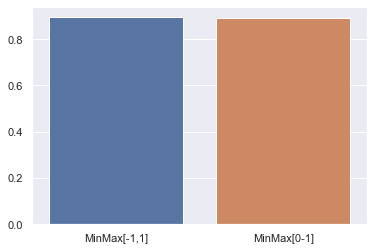

In [76]:
x = ['MinMax[-1,1]','MinMax[0-1]']
y = [model_min_max2.score(min_max2_X_val, y_val_df.squeeze().to_list()),
     
model_min_max1.score(min_max1_X_val, y_val_df.squeeze().to_list())]

sns.barplot(x, y)

In [77]:
#minmax(0,1) better results

## Robust for outliers

In [78]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(X_train_out[metric_feat])
X_train_out_scaled = transformer.transform(X_train_out[metric_feat]) 
X_train_out_robust=X_train_out.copy()
#X_train_out_robust[metric_feat]= pd.DataFrame(transformer.fit_transform(X_train_out[metric_feat]))

# Convert the array to a pandas dataframe
X_train_out_robust[metric_feat] = pd.DataFrame(X_train_out_scaled, columns = metric_feat).set_index(X_train_out_robust[metric_feat].index)

X_train_out_robust.describe().T
#X_train_out.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,6385.0,0.373101,0.854336,-0.250000,-0.250000,0.0,0.750000,6.500000
AccountMng_Duration,6385.0,0.698292,1.866335,-0.174401,-0.174401,0.0,0.825599,33.504365
FAQ_Pages,6385.0,0.532185,1.333351,0.000000,0.000000,0.0,0.000000,24.000000
FAQ_Duration,6385.0,37.447205,146.235749,0.000000,0.000000,0.0,0.000000,2549.375000
Product_Pages,6385.0,0.480496,1.503819,-0.633333,-0.333333,0.0,0.666667,22.866667
...,...,...,...,...,...,...,...,...
traffic11,6385.0,0.022396,0.147980,0.000000,0.000000,0.0,0.000000,1.000000
traffic12,6385.0,0.004229,0.064896,0.000000,0.000000,0.0,0.000000,1.000000
traffic13,6385.0,0.053876,0.225791,0.000000,0.000000,0.0,0.000000,1.000000
traffic14,6385.0,0.002976,0.054473,0.000000,0.000000,0.0,0.000000,1.000000


In [79]:
X_val_out_scaled = transformer.transform(X_val_out[metric_feat])
X_val_out_robust=X_val_out.copy()
X_val_out_robust[metric_feat] = pd.DataFrame(X_val_out_scaled, columns = metric_feat).set_index(X_val_out[metric_feat].index)
X_val_out_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2737.0,0.356229,0.846670,-0.250000,-0.250000,0.000000,0.75000,6.250000
AccountMng_Duration,2737.0,0.655553,1.741473,-0.174401,-0.174401,-0.045582,0.81156,20.503544
FAQ_Pages,2737.0,0.527950,1.310678,0.000000,0.000000,0.000000,0.00000,14.000000
FAQ_Duration,2737.0,38.056314,144.820330,0.000000,0.000000,0.000000,0.00000,2195.300049
Product_Pages,2737.0,0.485093,1.525555,-0.633333,-0.333333,0.033333,0.70000,22.233333
...,...,...,...,...,...,...,...,...
traffic11,2737.0,0.017172,0.129936,0.000000,0.000000,0.000000,0.00000,1.000000
traffic12,2737.0,0.003288,0.057260,0.000000,0.000000,0.000000,0.00000,1.000000
traffic13,2737.0,0.062477,0.242064,0.000000,0.000000,0.000000,0.00000,1.000000
traffic14,2737.0,0.002558,0.050517,0.000000,0.000000,0.000000,0.00000,1.000000


In [80]:
X_test_scaled = transformer.transform(X_test_robust[metric_feat])
X_test_robust[metric_feat] = pd.DataFrame(X_test_scaled, columns = metric_feat).set_index(X_test_robust[metric_feat].index)
X_test_robust.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,2300.0,0.322500,0.813075,-0.250000,-0.250000,0.000000,0.750000,5.500000
AccountMng_Duration,2300.0,0.616161,1.629538,-0.174401,-0.174401,-0.089678,0.795210,26.783475
FAQ_Pages,2300.0,0.486522,1.234311,0.000000,0.000000,0.000000,0.000000,12.000000
FAQ_Duration,2300.0,34.266832,145.500683,0.000000,0.000000,0.000000,0.000000,2252.033203
Product_Pages,2300.0,0.430957,1.471674,-0.633333,-0.366667,-0.033333,0.633333,17.166667
...,...,...,...,...,...,...,...,...
traffic11,2300.0,0.017391,0.130753,0.000000,0.000000,0.000000,0.000000,1.000000
traffic12,2300.0,0.002609,0.051020,0.000000,0.000000,0.000000,0.000000,1.000000
traffic13,2300.0,0.061739,0.240733,0.000000,0.000000,0.000000,0.000000,1.000000
traffic14,2300.0,0.002609,0.051020,0.000000,0.000000,0.000000,0.000000,1.000000


In [81]:
y_train_out=y_train.squeeze().to_list()
y_val_out=y_val.squeeze().to_list()

## to test with outliers
X_train_out_robust -- y_train_out
X_val_out_robust --- y_val_out
X_test_robust

<hr>
<a class="anchor" id="redo-outliers">
    
# Redo outliers check
    
</a>

In [82]:
y_train_no_out=y_train_df

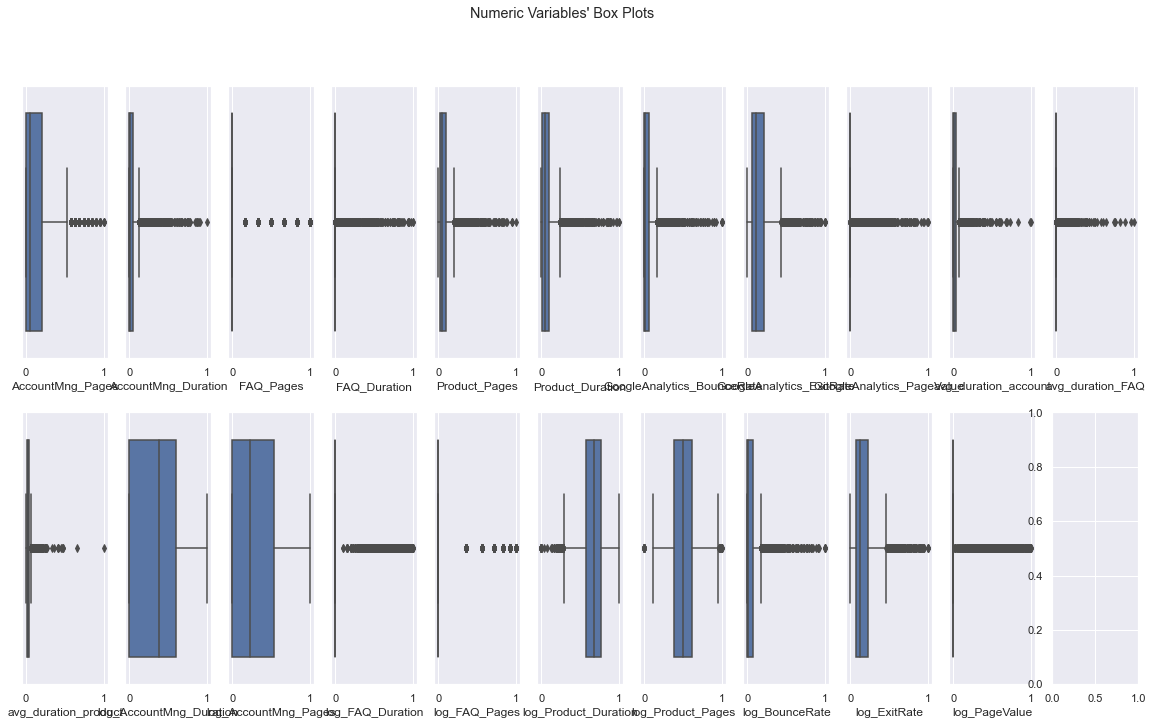

In [83]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(X_train_eng[metric_feat].columns.tolist()) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), X_train_eng[metric_feat].columns.tolist()): # Notice the zip() function and flatten() method
    sns.boxplot(x=X_train_eng[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()


<a class="anchor" id="FeatureSelection">
    
# Feature Selection
    
</a>


<a class="anchor" id="univariate">
    
## Univariate analysis
    
</a>

In [84]:
X_train_eng[metric_feat].var()

AccountMng_Pages              0.029711
AccountMng_Duration           0.007797
FAQ_Pages                     0.033364
FAQ_Duration                  0.008625
Product_Pages                 0.009953
Product_Duration              0.012651
GoogleAnalytics_BounceRate    0.012139
GoogleAnalytics_ExitRate      0.022890
GoogleAnalytics_PageValue     0.010853
avg_duration_account          0.002854
avg_duration_FAQ              0.002513
avg_duration_product          0.001091
log_AccountMng_Duration       0.096653
log_AccountMng_Pages          0.082857
log_FAQ_Duration              0.066159
log_FAQ_Pages                 0.060571
log_Product_Duration          0.022431
log_Product_Pages             0.028468
log_BounceRate                0.013283
log_ExitRate                  0.024454
log_PageValue                 0.064579
dtype: float64

None of the variables is univariate so we don't have to drop any variable, at least according with this method

In [85]:
# https://scikit-learn.org/stable/modules/feature_selection.html 
pd.DataFrame(X_train_eng[binary_list].var())

,0
browser1,0.155019
browser2,0.225445
browser3,0.008663
browser4,0.054637
browser5,0.034771
browser6,0.014560
browser7,0.004430
browser8,0.010067
browser10,0.013634
browser11,0.000476


In [86]:
0.8*(1-0.8)

0.15999999999999998

<hr>
<a class="anchor" id="filter">
    
## Filter Methods
    
</a>

<hr>
<a class="anchor" id="correlation">
    
### Correlation Matrix
    
</a>

In [87]:
# Dataframe with the dependent and independent variables
all_train_num = X_train_eng[metric_feat].join(y_train)

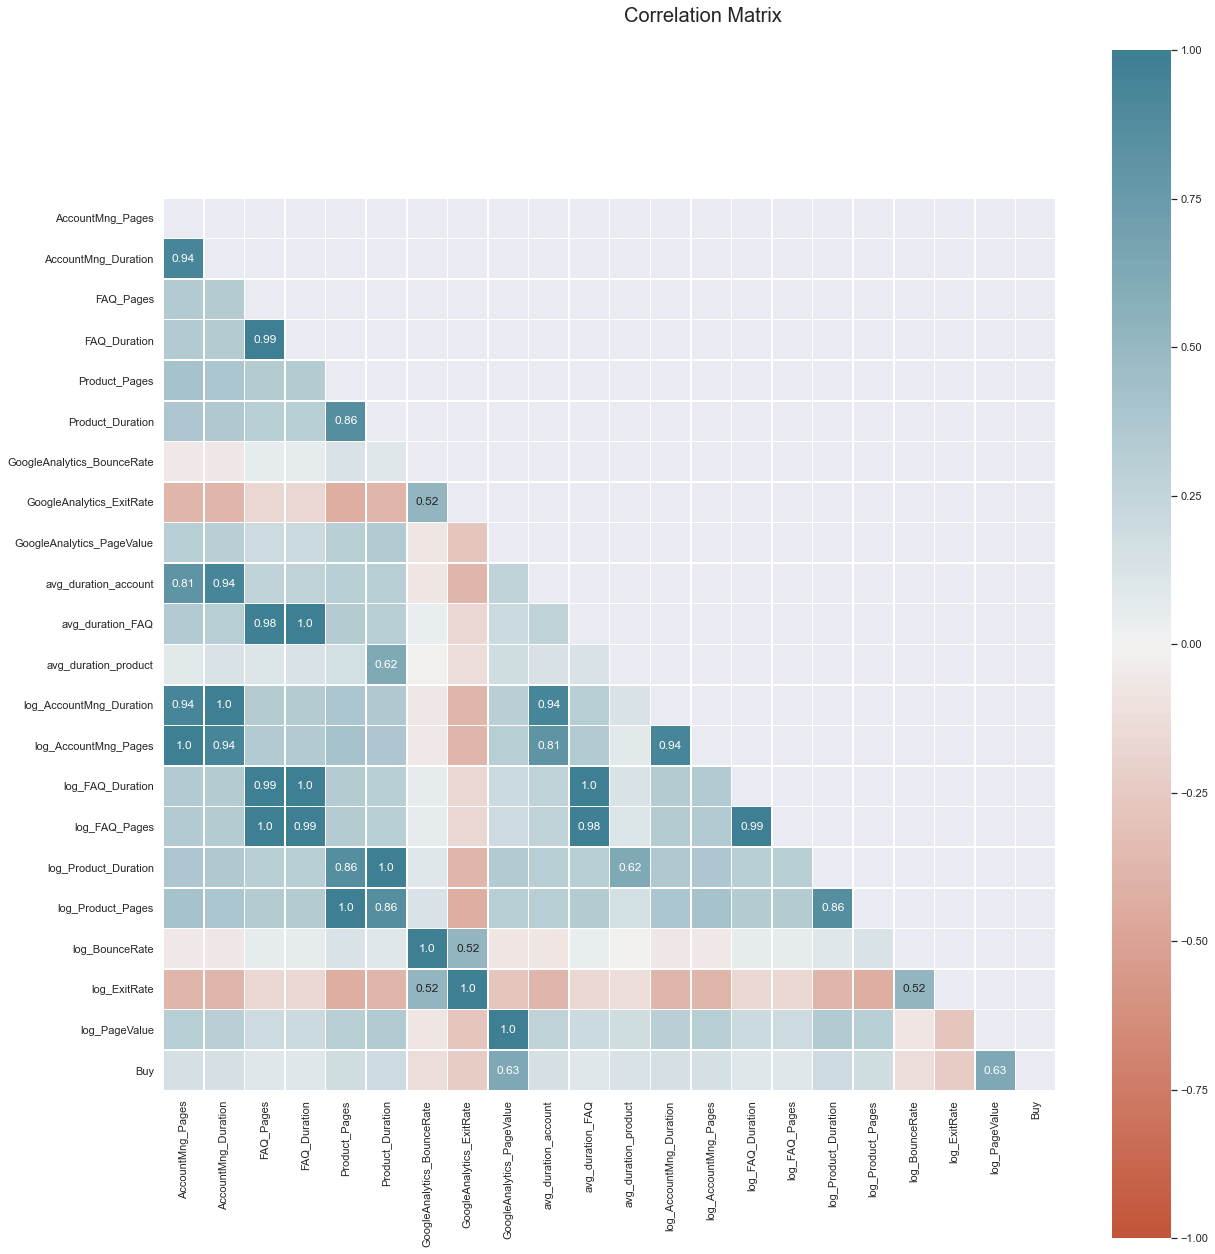

In [88]:
# # function to create a heatmat
# def cor_heatmap(cor):
#     plt.figure(figsize=(20,20))
#     cor=np.round()
#     matrix = np.triu(cor)

#     # using the upper triangle matrix as mask 
#     sns.heatmap(data = cor, annot = True, fmt='.1', mask=matrix,cmap=sns.diverging_palette(20, 220, n=200))   
#     plt.show()    

# Prepare figure
fig = plt.figure(figsize=(20, 20))

# Obtain correlation matrix. Round the values to 2 decimal cases.
corr = np.round(all_train_num.corr(method="spearman"),2)
matrix = np.triu(corr)
# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot,mask=matrix,cmap=sns.diverging_palette(20, 220, n=200), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

In [89]:
# cor_spearman = all_train_num.corr(method ='spearman')

In [90]:
# cor_heatmap(cor_spearman)

GoogleAnalytics_PageValue and log_PageValue are highly correlated with the target variable so we should keep them one of them since they are redundant.

- There are pairs of variables highly correlated, namely:
    - avg_duration_account vs AccountMng_Pages (0.9) <br>
    - avg_duration_account vs AccountMng_Duration (1) <br>
    - log_AccountMng_Duration vs AccountMng_Pages (0.9) <br>
    - log_FAQ_Duration vs FAQ_Pages (1) <br>
    - log_FAQ_Pages vs FAQ_Duration (1) <br>
    - log_Product_Duration vs Product_Pages (0.9) <br>
    - log_Product_Pages vs Product_Duration (0.9) <br>
    - log_BounceRate vs GoogleAnalytics_ExitRate (0.5) <br>
    - log_ExitRate vs GoogleAnalytics_BounceRate (0.9) <br>

<hr>
<a class="anchor" id="chi-squared">
    
### Chi-Squared
    
</a>

In [91]:
X_chisquare=X_train_eng[binary_list]

In [92]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [93]:
#for var in X_chisquare:
 #   TestIndependence(X_chisquare[var],y_train_no_out, var)

<hr>
<a class="anchor" id="ANOVA">
    
### ANOVA
    
</a>

In [94]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    
    X_train_fs = pd.DataFrame(fs.transform(X_train))
    
    #X_test_fs = fs.transform(X_test)
    return X_train_fs, fs


In [95]:
select_features(X_train_eng[metric_feat], y_train_df)

(            0         1         2         3         4         5       6   \
 0     0.000000  0.000000  0.000000  0.000000  0.040302  0.032504  0.0625   
 1     0.368421  0.064256  0.000000  0.000000  0.068010  0.033594  0.0250   
 2     0.000000  0.000000  0.000000  0.000000  0.047859  0.052192  0.0000   
 3     0.052632  0.021592  0.000000  0.000000  0.030227  0.016709  0.0770   
 4     0.157895  0.028096  0.000000  0.000000  0.125945  0.134472  0.0200   
 ...        ...       ...       ...       ...       ...       ...     ...   
 6289  0.368421  0.060212  0.000000  0.000000  0.108312  0.187164  0.1530   
 6290  0.000000  0.000000  0.000000  0.000000  0.025189  0.042987  0.1000   
 6291  0.052632  0.028616  0.333333  0.016669  0.022670  0.038555  0.0000   
 6292  0.000000  0.000000  0.333333  0.021300  0.010076  0.004063  0.0000   
 6293  0.210526  0.029483  0.000000  0.000000  0.052897  0.056094  0.0000   
 
           7         8         9   ...        11        12        13      

In [96]:
X_train_fs, fs =select_features(X_train_eng[metric_feat], y_train_df)
dict_feat={}

for i in range(len(fs.scores_)):
    dict_feat[X_train_eng[metric_feat].columns[i]]=fs.scores_[i]
    
dict(sorted(dict_feat.items(), key=lambda item: item[1]))
 

{'avg_duration_product': 1.9134508482669195,
 'avg_duration_FAQ': 15.367573919551862,
 'FAQ_Duration': 33.214396124210424,
 'FAQ_Pages': 45.26848920720166,
 'avg_duration_account': 47.792711816734126,
 'log_FAQ_Pages': 51.39870932691392,
 'AccountMng_Duration': 56.754439028263405,
 'log_FAQ_Duration': 57.380602389014555,
 'AccountMng_Pages': 103.70582784079672,
 'GoogleAnalytics_BounceRate': 115.18582793468285,
 'log_BounceRate': 118.03514720327895,
 'log_AccountMng_Pages': 139.12343454574753,
 'Product_Pages': 155.704895045797,
 'log_AccountMng_Duration': 161.28730171614697,
 'Product_Duration': 172.44065960959074,
 'log_Product_Pages': 206.5623342756309,
 'log_Product_Duration': 226.45804502166416,
 'GoogleAnalytics_ExitRate': 285.8902574236915,
 'log_ExitRate': 292.9821662678552,
 'GoogleAnalytics_PageValue': 2576.1828873140703,
 'log_PageValue': 4275.379600102718}

Feature 0: 103.705828
Feature 1: 56.754439
Feature 2: 45.268489
Feature 3: 33.214396
Feature 4: 155.704895
Feature 5: 172.440660
Feature 6: 115.185828
Feature 7: 285.890257
Feature 8: 2576.182887
Feature 9: 47.792712
Feature 10: 15.367574
Feature 11: 1.913451
Feature 12: 161.287302
Feature 13: 139.123435
Feature 14: 57.380602
Feature 15: 51.398709
Feature 16: 226.458045
Feature 17: 206.562334
Feature 18: 118.035147
Feature 19: 292.982166
Feature 20: 4275.379600


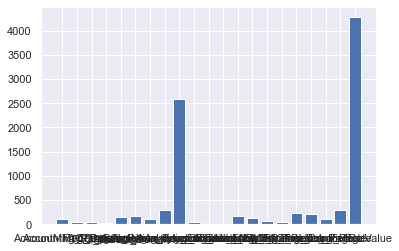

In [97]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in metric_feat], fs.scores_,)
pyplot.show()

<hr>
<a class="anchor" id="wrapper">
    
## Wrapper Methods
    
</a>

<hr>
<a class="anchor" id="RFE">
    
### RFE
    
</a>

Optimal number of features : 12
Max accuracy: 0.8903721504057905


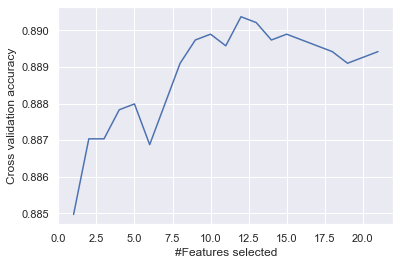

array([0.88497003, 0.88703566, 0.88703579, 0.88783007, 0.88798893,
       0.88687656, 0.88798868, 0.88910067, 0.8897371 , 0.88989583,
       0.88957812, 0.89037215, 0.89021317, 0.8897366 , 0.88989558,
       0.88973673, 0.88957787, 0.88941901, 0.8891013 , 0.88926003,
       0.88941901])

In [98]:
#Doing the same using RFECV and KFold

min_features_to_select = 1  
rfecv = RFECV(
    estimator=LogisticRegression(),
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select= min_features_to_select
)
rfecv.fit(X_train_eng[metric_feat], y_train_df)

print(f"Optimal number of features : {rfecv.n_features_}")
print(f"Max accuracy: {np.amax(rfecv.grid_scores_)}" )

# Plot features vs validation scores
plt.figure()
plt.xlabel("#Features selected")
plt.ylabel("Cross validation accuracy")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()
# update version
rfecv.grid_scores_

In [99]:
X_train_eng[metric_feat+binary_list].columns.to_list()

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'avg_duration_account',
 'avg_duration_FAQ',
 'avg_duration_product',
 'log_AccountMng_Duration',
 'log_AccountMng_Pages',
 'log_FAQ_Duration',
 'log_FAQ_Pages',
 'log_Product_Duration',
 'log_Product_Pages',
 'log_BounceRate',
 'log_ExitRate',
 'log_PageValue',
 'browser1',
 'browser2',
 'browser3',
 'browser4',
 'browser5',
 'browser6',
 'browser7',
 'browser8',
 'browser10',
 'browser11',
 'browser12',
 'browser13',
 'x1_Brazil',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_Android',
 'x2_Chrome OS',
 'x2_Fedora',
 'x2_MacOSX',
 'x2_Other',
 'x2_Ubuntu',
 'x2_Windows',
 'x2_iOS',
 'x3_New_Access',
 'x3_Other',
 'x3_Returner',
 'traffic1',
 'traffic2',
 'traffic3',
 'traffic4',
 'traffic5',
 'traff

In [100]:
rfecv.support_

array([ True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True, False,
        True,  True,  True])

In [101]:
binary_list

['browser1',
 'browser2',
 'browser3',
 'browser4',
 'browser5',
 'browser6',
 'browser7',
 'browser8',
 'browser10',
 'browser11',
 'browser12',
 'browser13',
 'x1_Brazil',
 'x1_France',
 'x1_Germany',
 'x1_Italy',
 'x1_Other',
 'x1_Portugal',
 'x1_Spain',
 'x1_Switzerland',
 'x1_United Kingdom',
 'x2_Android',
 'x2_Chrome OS',
 'x2_Fedora',
 'x2_MacOSX',
 'x2_Other',
 'x2_Ubuntu',
 'x2_Windows',
 'x2_iOS',
 'x3_New_Access',
 'x3_Other',
 'x3_Returner',
 'traffic1',
 'traffic2',
 'traffic3',
 'traffic4',
 'traffic5',
 'traffic6',
 'traffic7',
 'traffic8',
 'traffic9',
 'traffic10',
 'traffic11',
 'traffic12',
 'traffic13',
 'traffic14',
 'traffic15',
 'during_covid']

In [102]:
X_val_eng.columns

Index(['Date', 'AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages',
       'FAQ_Duration', 'Product_Pages', 'Product_Duration',
       'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'OS', 'Browser', 'Country',
       'Type_of_Traffic', 'Type_of_Visitor', 'day', 'month',
       'avg_duration_account', 'avg_duration_FAQ', 'avg_duration_product',
       'log_AccountMng_Duration', 'log_AccountMng_Pages', 'log_FAQ_Duration',
       'log_FAQ_Pages', 'log_Product_Duration', 'log_Product_Pages',
       'log_BounceRate', 'log_ExitRate', 'log_PageValue', 'during_covid',
       'browser1', 'browser2', 'browser3', 'browser4', 'browser5', 'browser6',
       'browser7', 'browser8', 'browser10', 'browser12', 'browser13',
       'x1_Brazil', 'x1_France', 'x1_Germany', 'x1_Italy', 'x1_Other',
       'x1_Portugal', 'x1_Spain', 'x1_Switzerland', 'x1_United Kingdom',
       'x2_Android', 'x2_Chrome OS', 'x2_MacOSX', 'x2_Other', 'x2_Ubuntu',
       'x2_Wind

In [103]:
# #As per in class

# from sklearn.feature_selection import RFE

# #no of features
# nof_list= [1,2,3,4,5,6,7]           
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]

# #RFE Support
# rfe_support = []

# for n in nof_list:
#     model = LogisticRegression()
#     rfe = RFE(model,n_features_to_select = n)
#     X_train_rfe = rfe.fit_transform(np.array(X_train_eng[metric_feat+binary_list]), y_train_df.astype("int64"))
#     X_val_rfe = rfe.transform(X_val_eng[metric_feat+binary_list])
#     model.fit(np.array(X_train_rfe),y_train_df.astype("int64"))
    
#     score = model.score(X_val_rfe,y_val)
#     score_list.append(score)
    
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]

# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))


<hr>
<a class="anchor" id="forward">
    
### Forward Sequential Feature Selection
    
</a>

In [104]:

ridge_forward = Ridge()
sfs = SequentialFeatureSelector(ridge_forward, n_features_to_select=15,direction='forward')
sfs.fit(X_train_eng[metric_feat+binary_list], y_train_df)

sfs.get_support()

teste_forward=sfs.transform(X_train_eng[metric_feat+binary_list])

In [105]:
sfs.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True, False, False, False,  True,  True])

In [106]:
selected_feat_forward = pd.Series(sfs.get_support(), index = X_train_eng[metric_feat+binary_list].columns)
pd.DataFrame(selected_feat_forward)

,0
AccountMng_Pages,True
AccountMng_Duration,False
FAQ_Pages,False
FAQ_Duration,False
Product_Pages,False
...,...
traffic12,False
traffic13,False
traffic14,False
traffic15,True


In [107]:
pd.set_option('display.max_rows', 100)

pd.DataFrame(selected_feat_forward)

,0
AccountMng_Pages,True
AccountMng_Duration,False
FAQ_Pages,False
FAQ_Duration,False
Product_Pages,False
Product_Duration,True
GoogleAnalytics_BounceRate,False
GoogleAnalytics_ExitRate,False
GoogleAnalytics_PageValue,False
avg_duration_account,False


<hr>
<a class="anchor" id="forward">
    
### Backward Sequential Feature Selection
    
</a>

In [108]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import Lasso

# logistic_back = Lasso()
# sfs_back = SequentialFeatureSelector(logistic_back, n_features_to_select=8,direction='backward')
# sfs_back.fit(X_train_num_min, y_train_no_out.to_list())

# sfs_back.get_support()

In [109]:
# selected_feat_back = pd.Series(sfs_back.get_support(), index = X_train_num_min.columns)
# selected_feat_back

<hr>
<a class="anchor" id="embedded">
    
## Embedded Methods
    
</a>


<hr>
<a class="anchor" id="ridge">
    
### Ridge Regression    
</a>

In [110]:
ridge = Ridge()
ridge.fit(X_train_eng[metric_feat], y_train_df)

Ridge()

In [111]:
ridge_coefs = pd.Series(ridge.coef_[0], index = X_train_eng[metric_feat].columns)
ridge_coefs

AccountMng_Pages             -0.105067
AccountMng_Duration          -0.090529
FAQ_Pages                    -0.139283
FAQ_Duration                  0.087633
Product_Pages                 0.213984
Product_Duration              0.233997
GoogleAnalytics_BounceRate    0.086278
GoogleAnalytics_ExitRate     -0.008668
GoogleAnalytics_PageValue    -0.088875
avg_duration_account          0.245069
avg_duration_FAQ             -0.239027
avg_duration_product         -0.077792
log_AccountMng_Duration      -0.018977
log_AccountMng_Pages          0.011365
log_FAQ_Duration              0.008815
log_FAQ_Pages                 0.072200
log_Product_Duration         -0.104989
log_Product_Pages            -0.135404
log_BounceRate               -0.035907
log_ExitRate                 -0.211693
log_PageValue                 0.944446
dtype: float64

In [112]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

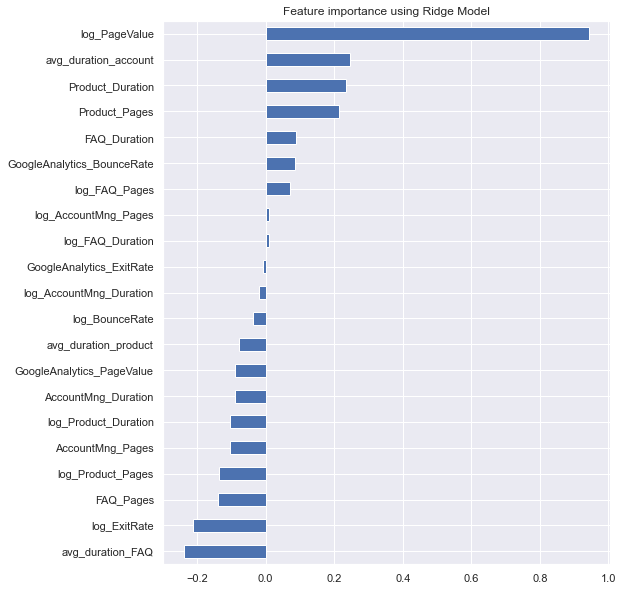

In [113]:
plot_importance(ridge_coefs,'Ridge')

<hr>
<a class="anchor" id="decision_tree_sel_feature">
    
### Decision Tree for feature importance   
</a>

In [114]:
gini_importance = DecisionTreeClassifier().fit(X_train_eng[metric_feat+binary_list], y_train_df).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_eng[metric_feat+binary_list], y_train_df).feature_importances_
gini_importance

array([0.01173005, 0.03738088, 0.00366799, 0.00969954, 0.02447906,
       0.04722527, 0.01512534, 0.0226952 , 0.03362409, 0.02929574,
       0.00951412, 0.05869843, 0.02550272, 0.02886583, 0.00680505,
       0.00578591, 0.02012302, 0.02655012, 0.05075315, 0.03318854,
       0.38196941, 0.00415588, 0.00153408, 0.00093985, 0.00660156,
       0.00210685, 0.00137233, 0.        , 0.00095309, 0.00122831,
       0.        , 0.00054108, 0.        , 0.00175767, 0.00750345,
       0.00130299, 0.00324717, 0.00506989, 0.00928225, 0.00430128,
       0.00205097, 0.00084448, 0.00439962, 0.0011544 , 0.        ,
       0.00267296, 0.00098391, 0.00096661, 0.00518604, 0.00252151,
       0.00221517, 0.00052027, 0.00269046, 0.00504236, 0.00146065,
       0.00120809, 0.00611649, 0.        , 0.00226161, 0.        ,
       0.00539937, 0.        , 0.00528341, 0.00355444, 0.        ,
       0.00094371, 0.        , 0.00180347, 0.0061428 ])

In [115]:
feat_DT=['GoogleAnalytics_PageValue','log_BounceRate','avg_duration_product','log_AccountMng_Pages']

<AxesSubplot:xlabel='Value', ylabel='Col'>

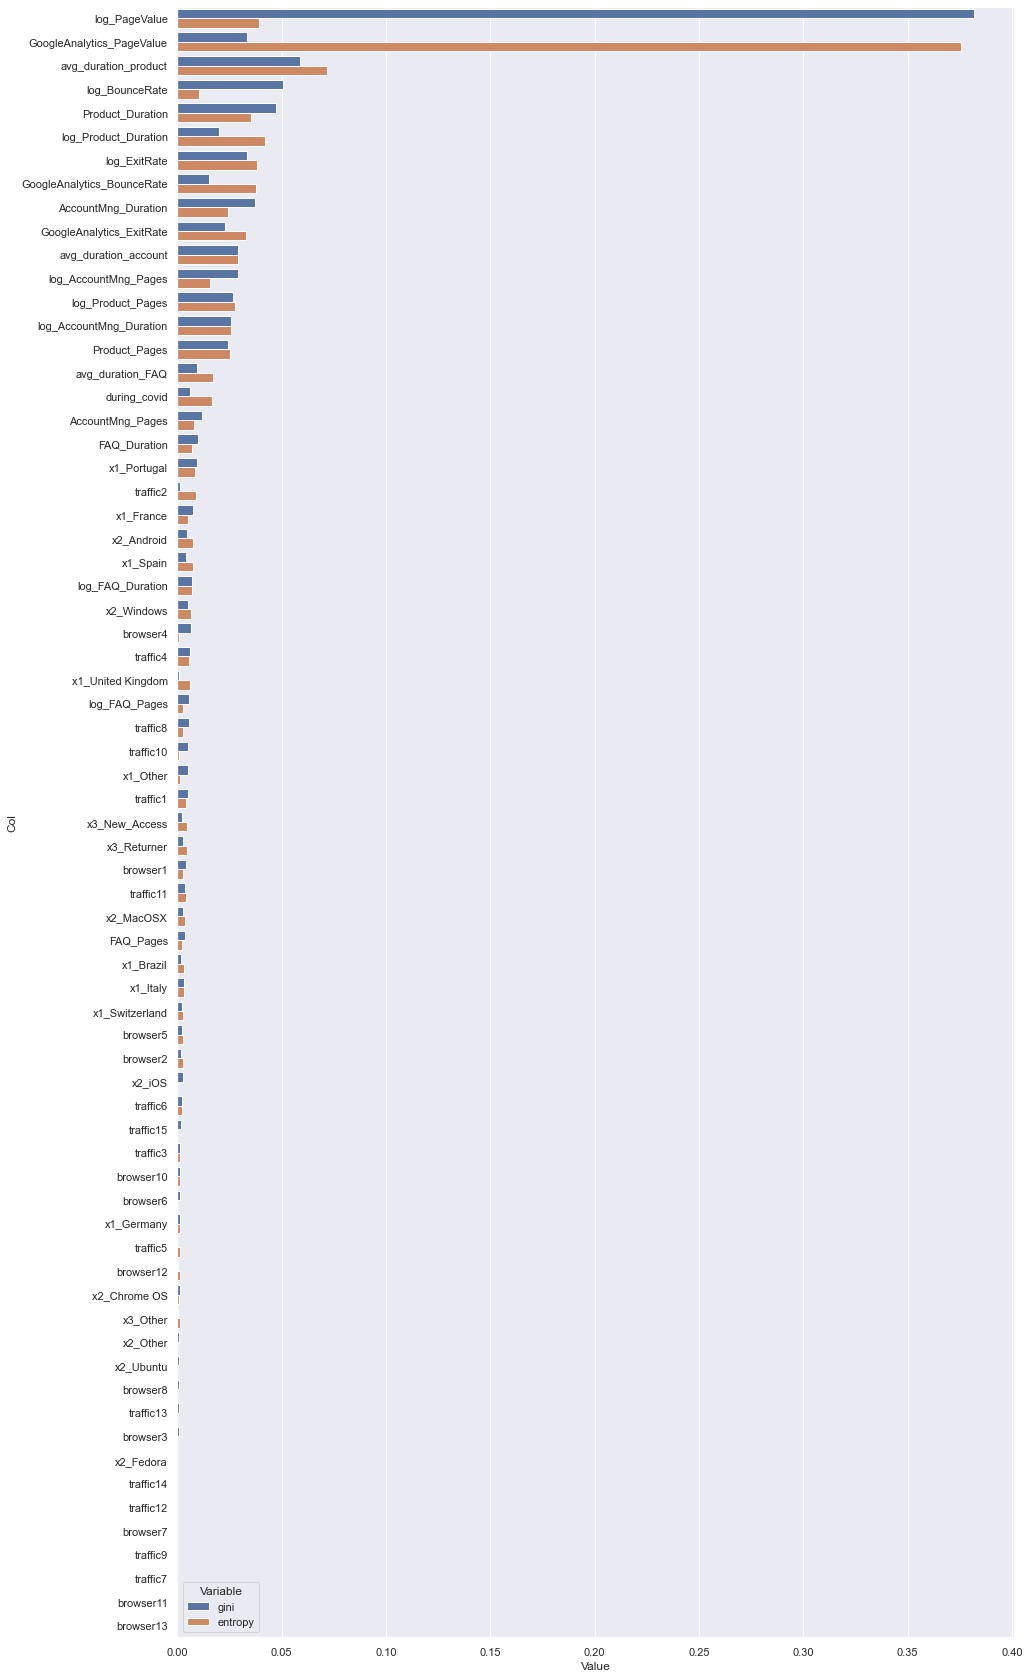

In [116]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_eng[metric_feat+binary_list].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,30))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<hr>
<a class="anchor" id="imbalanced">
    
# Check for an imbalanced dataset
    
</a>

<hr>
<a class="anchor" id="Adaptive">
    
## SMOTENC 
    
</a>

In [117]:
X_train_eng=X_train_eng.drop(non_num_feat,axis=1)
X_val_eng=X_val_eng.drop(non_num_feat,axis=1)

In [118]:
# X_train_RSKF=pd.concat([X_train_eng,y_train_df],axis=1)
# X_val_RSKF=pd.concat([X_val_eng,y_val_df],axis=1)
# data_RSKF=pd.concat([X_train_RSKF,X_val_RSKF],axis=0)


In [119]:
# X_RSKF=data_RSKF.iloc[:,:-1]
# y_RSKF=data_RSKF.iloc[:,-1]

In [120]:
y_val_df=y_val_df.squeeze().to_list()
y_train_df=y_train_df.squeeze().to_list()

In [121]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(sampling_strategy='minority', random_state=0, n_neighbors=5)
# X_train_over, y_train_over = adasyn.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df.to_list())

In [122]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='minority')
# X_train_over, y_train_over = smote.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df.to_list())

In [123]:
smote_nc = SMOTENC(categorical_features=range(21,69), random_state=42)
X_train_over, y_train_over = smote_nc.fit_resample(X_train_eng[metric_feat+binary_list], y_train_df)

In [124]:
count1=0
count0=0

for value in y_train_over:
    if value==1:
        count1+=1
    else: count0+=1
        
print(count1,count0)

5286 5286


In [125]:
feat_DT=['GoogleAnalytics_PageValue','log_BounceRate','avg_duration_product','log_AccountMng_Pages']

In [126]:
set1=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic2','during_covid']
set2=['AccountMng_Pages','Product_Duration','log_PageValue','x3_New_Access','traffic2','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']
set3=['AccountMng_Pages','Product_Duration','log_PageValue','x2_MacOSX','x2_Windows','during_covid','GoogleAnalytics_ExitRate','log_FAQ_Pages']

set1_no_bin=['AccountMng_Pages','Product_Duration','log_PageValue','GoogleAnalytics_ExitRate','log_FAQ_Pages']
set2_no_bin=['AccountMng_Pages','Product_Duration','log_PageValue','GoogleAnalytics_ExitRate','log_FAQ_Pages']

In [127]:
sets=[set1, set2, set3,set1_no_bin,set2_no_bin]

X_train_over y_train_over; X_val_eng y_val_df

X_train_eng y_train_df; X_val_eng y_val_df

In [128]:
def metrics1(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print('Confusion Matrix:')
    print(confusion_matrix(y_val, pred_val))
    
    print('F1 Train: '+str(f1_score(y_train, pred_train)))
    print('F1 Val: '+str(f1_score(y_val, pred_val)))
    print('ROC: '+str(roc_auc_score(y_val, pred_val)))

In [129]:
# def f1_train_val(y_train, pred_train , y_val, pred_val):
#     print('Train: '+str(f1_score(y_train, pred_train)))
#     print('Val: '+str(f1_score(y_val, pred_val)))

## Strafified kfold

In [130]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores_f1 = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
    scores_auc = cross_val_score(model, X, y, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=-1)
    print('F1 score: %.3f (%.3f)' % (np.mean(scores_f1), np.std(scores_f1)))
    print('ROC_AUC score: %.3f (%.3f)' % (np.mean(scores_auc), np.std(scores_auc)))
    return scores_f1

<hr>
<a class="anchor" id="DT">
    
## Decision Tree
    
</a>

X_train_over y_train_over; X_val_eng y_val_df

X_train_eng y_train_df

# DT WITHOUT OVERSAMPLING

## Dataset with outliers for DT

In [131]:
min_samples_split=[200,300,350,400,450,500,550,600]

for i in min_samples_split:
    print('set: '+str(i))
    dt_out = DecisionTreeClassifier(splitter = 'random',class_weight={0:1,1:5.6}, min_samples_split=i, criterion='gini').fit(X_train_out_robust[set1], y_train_out)
    metrics1(y_train_out, dt_out.predict(X_train_out_robust[set1]), y_val_out, dt_out.predict(X_val_out_robust[set1]))


set: 200
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5351
           1       0.56      0.82      0.67      1034

    accuracy                           0.87      6385
   macro avg       0.76      0.85      0.79      6385
weighted avg       0.90      0.87      0.88      6385

Confusion Matrix:
[[4686  665]
 [ 186  848]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

## dataset without outliers

In [132]:
min_samples_split=[200,300,350,400,450,500,550,600]

In [133]:
for i in min_samples_split:
    print('set: '+str(i))
    dt = DecisionTreeClassifier(splitter = 'random', class_weight={0:1,1:5.6}, min_samples_split=i, criterion='gini',random_state=42).fit(X_train_eng[set1], y_train_df)
    metrics1(y_train_df, dt.predict(X_train_eng[set1]) , y_val_df, dt.predict(X_val_eng[set1]))

set: 200
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5286
           1       0.52      0.85      0.65      1008

    accuracy                           0.85      6294
   macro avg       0.74      0.85      0.78      6294
weighted avg       0.90      0.85      0.86      6294

Confusion Matrix:
[[4499  787]
 [ 153  855]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

In [134]:
dt = DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini',random_state=42).fit(X_train_eng[set1], y_train_df)

In [135]:
metrics1(y_train_df, dt.predict(X_train_eng[set1]) , y_val_df, dt.predict(X_val_eng[set1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5286
           1       0.56      0.81      0.66      1008

    accuracy                           0.87      6294
   macro avg       0.76      0.85      0.79      6294
weighted avg       0.90      0.87      0.88      6294

Confusion Matrix:
[[4651  635]
 [ 191  817]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [136]:
roc_dt=roc_auc_score(y_val_df,  dt.predict(X_val_eng[set1]))
roc_dt

0.843231215414361

In [137]:
#k-fold
evaluate_model(DecisionTreeClassifier(splitter = 'random', min_samples_split=450, class_weight={0:1,1:5.6}, criterion='gini',random_state=42), X_train_eng[set1], y_train_df)

F1 score: 0.656 (0.036)
ROC_AUC score: 0.841 (0.023)


array([0.6779661 , 0.67741935, 0.61302682, 0.65060241, 0.63374486,
       0.63673469, 0.69879518, 0.68253968, 0.67755102, 0.60655738,
       0.69787234, 0.58365759, 0.72131148, 0.624     , 0.67479675,
       0.61044177, 0.6798419 , 0.63900415, 0.6484375 , 0.69166667,
       0.69166667, 0.68992248, 0.61132075, 0.6504065 , 0.64285714,
       0.67716535, 0.66666667, 0.58498024, 0.69642857, 0.65116279])

In [138]:
labels_DT = dt.predict(X_test_eng[set1])
labels_DT

array([0, 0, 0, ..., 1, 0, 0])

In [139]:
labels_DT_df = pd.DataFrame(labels_DT)
kaggle_DT = pd.DataFrame(X_test_eng.index)
kaggle_DT

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [140]:
kaggle_DT = pd.concat([kaggle_DT["Access_ID"], labels_DT_df[0]],axis=1)
kaggle_DT["Buy"] = kaggle_DT[0]
kaggle_DT = kaggle_DT.drop(columns=[0])

In [141]:
kaggle_DT.set_index('Access_ID',inplace=True,drop=True)

In [142]:
kaggle_DT.value_counts()

Buy
0      1813
1       487
dtype: int64

In [143]:
kaggle_DT=kaggle_DT.astype(int)

In [144]:
file_name = 'kagGleDT.csv'
  
# saving the excel
kaggle_DT.to_csv(file_name)

# DT WITH OVERSAMPLING

In [145]:
for i in min_samples_split:
    print('set: '+str(i))
    dt_over = DecisionTreeClassifier(splitter = 'random', min_samples_split=i, criterion='gini').fit(X_train_over[set1_no_bin], y_train_over)
    metrics1(y_train_over, dt_over.predict(X_train_over[set1_no_bin]) , y_val_df, dt_over.predict(X_val_eng[set1_no_bin]))

set: 200
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5286
           1       0.88      0.84      0.86      5286

    accuracy                           0.86     10572
   macro avg       0.86      0.86      0.86     10572
weighted avg       0.86      0.86      0.86     10572

Confusion Matrix:
[[4651  635]
 [ 840 4446]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------

In [146]:
dt_over = DecisionTreeClassifier(splitter = 'random',criterion='gini',min_samples_split=400,random_state=42).fit(X_train_over[set1_no_bin], y_train_over)

<hr>
<a class="anchor" id="RF">
    
## Random Forest
    
</a>

In [147]:
sets_RF=list(set(X_train_eng.columns.to_list()) & set(X_val_eng.columns.to_list()) & set(metric_feat+binary_list))
#sets_RF1=set(metric_feat) | set(set1) |set(set2)|set(set3)
sets_RF1= set(set1) |set(set2)|set(set3)

In [148]:
sets_RF1

{'AccountMng_Pages',
 'GoogleAnalytics_ExitRate',
 'Product_Duration',
 'during_covid',
 'log_FAQ_Pages',
 'log_PageValue',
 'traffic2',
 'x2_MacOSX',
 'x2_Windows',
 'x3_New_Access'}

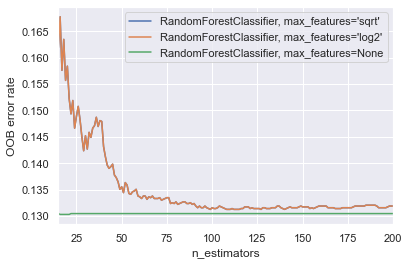

In [149]:
# adapted from https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html 

RANDOM_STATE = 42

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample'
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample'
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
            min_samples_leaf=500,
            class_weight='balanced_subsample'
            
        ),
    ),
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 15
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train_eng[sets_RF1], y_train_df)
        
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [150]:
error_rate

OrderedDict([("RandomForestClassifier, max_features='sqrt'",
              [(15, 0.1619002224340642),
               (16, 0.1677788369876072),
               (17, 0.1576104226247219),
               (18, 0.16348903717826502),
               (19, 0.155703844931681),
               (20, 0.15840482999682237),
               (21, 0.15220845249443915),
               (22, 0.14934858595487766),
               (23, 0.15189068954559903),
               (24, 0.14664760088973627),
               (25, 0.14887194153161742),
               (26, 0.15077851922465846),
               (27, 0.14823641563393708),
               (28, 0.14505878614553547),
               (29, 0.14235780108039398),
               (30, 0.14521766761995547),
               (31, 0.1426755640292342),
               (32, 0.14585319351763582),
               (33, 0.14489990467111535),
               (34, 0.14664760088973627),
               (35, 0.1471242453129965),
               (36, 0.1487130600571973),
               (37, 0.1

In [151]:
# n_estimators_list=[50,75,100,125,150,175,200,225,250,275,300]
# error_rate=[]
# for i in n_estimators_list:
#     clf=RandomForestClassifier(n_estimators=i,criterion="gini", max_features=None, min_samples_leaf=500,oob_score=True,warm_start=True)


#     clf.fit(X_train_eng[sets_RF], y_train_df)

#     y_pred=clf.predict(X_val_eng[sets_RF])
#     metrics1(y_train_df, clf.predict(X_train_eng[sets_RF]) , y_val_df, y_pred)
#     error_rate.append(clf.oob_score_)


In [152]:
clf=RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=500,random_state=42).fit(X_train_eng[sets_RF1], y_train_df)
# kaggle=0.676

In [153]:
metrics1(y_train_df, clf.predict(X_train_eng[sets_RF1]) , y_val_df, clf.predict(X_val_eng[sets_RF1]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5286
           1       0.56      0.81      0.67      1008

    accuracy                           0.87      6294
   macro avg       0.76      0.85      0.79      6294
weighted avg       0.90      0.87      0.88      6294

Confusion Matrix:
[[4656  630]
 [ 191  817]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [154]:
roc_RF=roc_auc_score(y_val_df, clf.predict(X_val_eng[sets_RF1]))
roc_RF

0.843231215414361

In [155]:
#k-fold
evaluate_model(RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=450,random_state=42), X_train_eng[sets_RF1], y_train_df)

F1 score: 0.666 (0.032)
ROC_AUC score: 0.846 (0.023)


array([0.6893617 , 0.67741935, 0.65322581, 0.656     , 0.63374486,
       0.6504065 , 0.704     , 0.688     , 0.69135802, 0.61157025,
       0.70940171, 0.6097561 , 0.72131148, 0.6374502 , 0.67782427,
       0.61044177, 0.68253968, 0.6446281 , 0.6692607 , 0.69709544,
       0.69709544, 0.7109375 , 0.63492063, 0.65863454, 0.64777328,
       0.68525896, 0.66382979, 0.60082305, 0.69642857, 0.6614786 ])

In [156]:
labels_RF = clf.predict(X_test_eng[sets_RF1])

In [157]:
labels_RF_df = pd.DataFrame(labels_RF)
kaggle_RF = pd.DataFrame(X_test_eng.index)
kaggle_RF

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [158]:
kaggle_RF = pd.concat([kaggle_RF["Access_ID"], labels_RF_df[0]],axis=1)
kaggle_RF["Buy"] = kaggle_RF[0]
kaggle_RF = kaggle_RF.drop(columns=[0])

In [159]:
kaggle_RF.set_index('Access_ID',inplace=True,drop=True)
kaggle_RF.value_counts()

Buy
0      1808
1       492
dtype: int64

In [160]:
kaggle_RF=kaggle_RF.astype(int)

In [161]:
file_name = 'kagGleRF.csv'
  
# saving the excel
kaggle_RF.to_csv(file_name)

<hr>
<a class="anchor" id="VC">
    
## Voting Classifier
    
</a>

In [162]:
set2_new=set2.copy()
set2_new.remove('traffic2')
set2_new.remove('x3_New_Access')

In [163]:
# from set2 remove binary variables

estimators = [('dt', DecisionTreeClassifier(splitter = 'random',class_weight={0:1,1:5.6},min_samples_split=350, criterion='gini',random_state=2)), 
              ('dt1', DecisionTreeClassifier(splitter = 'random',min_samples_split=200, criterion='gini',random_state=2)), 
              ('dt2', DecisionTreeClassifier(splitter = 'random',min_samples_split=300, criterion='gini',random_state=2)),
              ('dt3', DecisionTreeClassifier(splitter = 'random',min_samples_split=350, criterion='gini',random_state=2)),
             
              ('knn1',KNeighborsClassifier(n_neighbors=5)),
              ('knn3',KNeighborsClassifier(n_neighbors=4)),
              ('knn4',KNeighborsClassifier(n_neighbors=3))]


vot_hard = VotingClassifier(estimators = estimators, voting ='hard') 
vot_hard = vot_hard.fit(X_train_eng[set2_new], y_train_df) 
metrics1(y_train_df, vot_hard.predict(X_train_eng[set2_new]) , y_val_df, vot_hard.predict(X_val_eng[set2_new]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5286
           1       0.74      0.68      0.71      1008

    accuracy                           0.91      6294
   macro avg       0.84      0.82      0.83      6294
weighted avg       0.91      0.91      0.91      6294

Confusion Matrix:
[[5043  243]
 [ 326  682]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [164]:
f1_score(y_val_df,vot_hard.predict(X_val_eng[set2_new]),average='micro')

0.8831845238095238

In [165]:
vot_soft = VotingClassifier(estimators = estimators, voting ='soft') 
vot_soft = vot_soft.fit(X_train_eng[set2_new], y_train_df) 
metrics1(y_train_df, vot_soft.predict(X_train_eng[set2_new]) , y_val_df, vot_hard.predict(X_val_eng[set2_new]))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5286
           1       0.73      0.72      0.73      1008

    accuracy                           0.91      6294
   macro avg       0.84      0.83      0.84      6294
weighted avg       0.91      0.91      0.91      6294

Confusion Matrix:
[[5018  268]
 [ 282  726]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [166]:
roc_auc_score(y_val_df, vot_hard.predict(X_val_eng[set2_new]))

0.766767784518968

In [167]:
roc_auc_score(y_val_df, vot_soft.predict(X_val_eng[set2_new]))

0.7818812920861391

In [168]:
labels_VC=vot_soft.predict(X_test_eng[set1])

In [169]:
labels_VC

array([0, 0, 0, ..., 0, 0, 0])

In [170]:
labels_VC = pd.DataFrame(labels_VC)

In [171]:
kaggle_VC = pd.DataFrame(X_test_eng.index)
kaggle_VC

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [172]:
kaggle_VC = pd.concat([kaggle_VC["Access_ID"], labels_VC[0]],axis=1)
kaggle_VC["Buy"] = kaggle_VC[0]
kaggle_VC = kaggle_VC.drop(columns=[0])

In [173]:
kaggle_VC.set_index('Access_ID',inplace=True,drop=True)

In [174]:
kaggle_VC.value_counts()

Buy
0      2114
1       186
dtype: int64

In [175]:
kaggle_VC=kaggle_VC.astype(int)

In [176]:
file_name = 'kagGleVC.csv'
  
# saving the excel
kaggle_VC.to_csv(file_name)

<hr>
<a class="anchor" id="NN">
    
## Neural Network
    
</a>

In [177]:
for i in range(len(sets)):
    
    print(f'Scores using Set {i+1}')

    neural_network = MLPClassifier(max_iter=1000).fit(X_train_eng[sets[i]], y_train_df)
    
    predictions_train = neural_network.predict(X_train_eng[sets[i]])
    predictions_val = neural_network.predict(X_val_eng[sets[i]])
    
    metrics1(y_train_df, predictions_train , y_val_df, predictions_val)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5286
           1       0.71      0.56      0.63      1008

    accuracy                           0.89      6294
   macro avg       0.82      0.76      0.78      6294
weighted avg       0.89      0.89      0.89      6294

Confusion Matrix:
[[5059  227]
 [ 445  563]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

# Oversampling

In [178]:
# for i in range(len(sets)):
    
#     print(f'Scores using Set {i+1}')

#     neural_network = MLPClassifier(hidden_layer_sizes = 2).fit(X_train_over[sets[i]], y_train_over)
    
#     predictions_train_over = neural_network.predict(X_train_over[sets[i]])
#     predictions_val_over = neural_network.predict(X_val_eng[sets[i]])

#     metrics1(y_train_over, predictions_train_over , y_val_df, predictions_val_over)

In [179]:
# neural_network = MLPClassifier(max_iter = 1000).fit(X_train_over[set2], y_train_over)

In [180]:
# metrics1(y_train_over, neural_network.predict(X_train_over[set3]), y_val_df, neural_network.predict(X_val_eng[set3]))

In [181]:
for i in range(len(sets)):
    
     print(f'Scores using Set {i+1}')

     neural_network = MLPClassifier(hidden_layer_sizes = (10,10)).fit(X_train_eng[sets[i]], y_train_df)
    
     predictions_train = neural_network.predict(X_train_eng[sets[i]])
     predictions_val = neural_network.predict(X_val_eng[sets[i]])

     metrics1(y_train_df, predictions_train , y_val_df, predictions_val)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5286
           1       0.71      0.53      0.61      1008

    accuracy                           0.89      6294
   macro avg       0.81      0.74      0.77      6294
weighted avg       0.88      0.89      0.88      6294

Confusion Matrix:
[[5070  216]
 [ 473  535]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

No oversampling

Neural networks gridsearch for imbalanced dataset

In [182]:
mlp = MLPClassifier(random_state = 42)

In [183]:
 parameter_space = {
     'hidden_layer_sizes': [(12,12), (12,12,12), (10,10,10), (10,10)],
     'activation': ['tanh', 'relu', 'logistic'],
     'solver': ['adam', 'lbfgs', 'sgd'],
     'alpha': [0.1, 0.001, 0.01],
     'learning_rate': ['adaptive', 'invscaling'],
     'max_iter' : [100,500,750]
 }

In [184]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,scoring=make_scorer(f1_score, average='binary'))
clf.fit(X_train_eng[set3], y_train_df)
clf.predict(X_train_eng[set3])
clf.predict(X_val_eng[set3])

array([0, 0, 0, ..., 0, 0, 0])

In [185]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

print('---------------------------------------------------------------------------------------------------------------------')
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (12, 12, 12), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
---------------------------------------------------------------------------------------------------------------------
0.638 (+/-0.025) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
0.635 (+/-0.017) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'lbfgs'}
0.622 (+/-0.015) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}
0.637 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}
0.593 (+/-0.045) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (12, 12), 'learning

In [189]:
# DANIEL
neural_network_reg = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (12,12,12), learning_rate = 'adaptive', solver = 'lbfgs', max_iter = 100).fit(X_train_eng[set2], y_train_df)

In [187]:
# DANIEL
#metrics1(y_train_df, neural_network_reg.predict(X_train_eng[set2]), y_val_df, neural_network_reg.predict(X_val_eng[set2]))

In [188]:
labels_NN_reg = neural_network_reg.predict(X_test_eng[set3])

labels_NN_df_reg = pd.DataFrame(labels_NN_reg)

kaggle_NN_reg = pd.DataFrame(X_test_eng.index)

kaggle_NN_reg = pd.concat([kaggle_NN_reg["Access_ID"], labels_NN_df_reg[0]],axis=1)
kaggle_NN_reg["Buy"] = kaggle_NN_reg[0]
kaggle_NN_reg = kaggle_NN_reg.drop(columns=[0])

kaggle_NN_reg.set_index('Access_ID',inplace=True,drop=True)

kaggle_NN_reg.value_counts()

kaggle_NN_reg = kaggle_NN_reg.astype(int)

file_name = 'kagGleNN_reg.csv'
  
# saving the excel
kaggle_NN_reg.to_csv(file_name)

NameError: name 'neural_network_reg' is not defined

In [ ]:
#neural_network_reg1 = MLPClassifier(random_state = 42, activation = 'logistic', alpha = 0.001, hidden_layer_sizes = (10,10,10), learning_rate = 'adaptive', solver = 'adam', max_iter = 500).fit(X_train_eng[set2], y_train_df)

In [ ]:
#metrics1(y_train_df, neural_network_reg1.predict(X_train_eng[set2]), y_val_df, neural_network_reg1.predict(X_val_eng[set2]))

In [ ]:
# labels_NN_reg1 = neural_network_reg1.predict(X_test_eng[set1])

# labels_NN_df_reg1 = pd.DataFrame(labels_NN_reg1)

# kaggle_NN_reg1 = pd.DataFrame(X_test_eng.index)

# kaggle_NN_reg1 = pd.concat([kaggle_NN_reg1["Access_ID"], labels_NN_df_reg1[0]],axis=1)
# kaggle_NN_reg1["Buy"] = kaggle_NN_reg1[0]
# kaggle_NN_reg1 = kaggle_NN_reg1.drop(columns=[0])

# kaggle_NN_reg1.set_index('Access_ID',inplace=True,drop=True)

# kaggle_NN_reg1.value_counts()

# kaggle_NN_reg1 = kaggle_NN_reg1.astype(int)

# file_name = 'kagGleNN_reg1.csv'
  
# # saving the excel
# kaggle_NN_reg1.to_csv(file_name)

Neural network gridsearch oversampling

In [ ]:
#mlp_over = MLPClassifier(random_state = 42)

In [ ]:
# parameter_space = {
#     'hidden_layer_sizes': [(12,12), (12,12,12), (15,12,12), (12,15,12)],
#     'activation': ['tanh', 'relu', 'logistic'],
#     'solver': ['adam', 'lbfgs', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.00001],
#     'learning_rate': ['adaptive', 'invscaling'],
# }

In [ ]:
#clf = GridSearchCV(mlp_over, parameter_space, n_jobs=-1, cv=3)
#clf.fit(X_train_over[set2], y_train_over)
#clf.predict(X_train_over[set2])
#clf.predict(X_val_eng[set2])

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
## Best parameter set
#print('Best parameters found:\n', clf.best_params_)

#print('---------------------------------------------------------------------------------------------------------------------')
## All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
---------------------------------------------------------------------------------------------------------------------
0.851 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.855 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.843 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.851 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.855 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.561 (+/-0.016) for {'activation'

In [ ]:
#neural_network_over = MLPClassifier(random_state = 42, activation= 'tanh', alpha= 1e-05, hidden_layer_sizes= (12, 12), learning_rate= 'adaptive', solver= 'lbfgs').fit(X_train_over[set2], y_train_over)

<hr>
<a class="anchor" id="LR">
    
## Logistic Regression
    
</a>

### Without oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
for i in range(len(sets)):
    
    print(f'Scores using Set {i+1}')

    logistic_regression = LogisticRegression(class_weight={0:1,1:5.6}).fit(X_train_eng[sets[i]], y_train_df)
    
    predict_train_log = logistic_regression.predict(X_train_eng[sets[i]])
    predict_val_log = logistic_regression.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predict_train_log , y_val_df, predict_val_log)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5698
           1       0.56      0.79      0.65      1010

    accuracy                           0.87      6708
   macro avg       0.76      0.84      0.79      6708
weighted avg       0.90      0.87      0.88      6708

Confusion Matrix:
[[5066  632]
 [ 214  796]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [ ]:
logistic_regression = LogisticRegression(class_weight={0:1,1:5.6}).fit(X_train_eng[set1_no_bin], y_train_df)
    
predict_train_log = logistic_regression.predict(X_train_eng[set1_no_bin])
predict_val_log = logistic_regression.predict(X_val_eng[set1_no_bin])
    
    
metrics1(y_train_df, predict_train_log , y_val_df, predict_val_log)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5698
           1       0.56      0.80      0.66      1010

    accuracy                           0.88      6708
   macro avg       0.76      0.84      0.79      6708
weighted avg       0.90      0.88      0.88      6708

Confusion Matrix:
[[5068  630]
 [ 206  804]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
evaluate_model(LogisticRegression(class_weight={0:1,1:5.6}), X_train_eng[set1_no_bin], y_train_df)

F1 score: 0.658 (0.037)
ROC_AUC score: 0.843 (0.023)


(array([0.66666667, 0.6374502 , 0.57258065, 0.69491525, 0.67510549,
        0.66932271, 0.68503937, 0.62948207, 0.6779661 , 0.67479675,
        0.59760956, 0.68548387, 0.65079365, 0.71794872, 0.61478599,
        0.68049793, 0.69166667, 0.64031621, 0.60408163, 0.70535714,
        0.6984127 , 0.62040816, 0.675     , 0.63829787, 0.67219917,
        0.69230769, 0.7       , 0.63453815, 0.59677419, 0.65098039]),
 array([0.84108911, 0.8346361 , 0.78481848, 0.85944937, 0.8469168 ,
        0.85794685, 0.87279833, 0.82880841, 0.8477092 , 0.85640954,
        0.80549766, 0.86640611, 0.84541428, 0.87285913, 0.82354525,
        0.8550634 , 0.86176828, 0.8387094 , 0.80482521, 0.85242479,
        0.88038041, 0.8165885 , 0.85011291, 0.81953274, 0.84923571,
        0.85537606, 0.86759597, 0.83056279, 0.80218901, 0.84850093]))

In [ ]:
logistic_regression = LogisticRegression(class_weight={0:1,1:5.6}).fit(X_train_eng[set1_no_bin], y_train_df)
labels_logistic_reg = logistic_regression.predict(X_test_eng[set1_no_bin])

In [ ]:
df_logistic_reg = pd.DataFrame(labels_logistic_reg)
df_logistic_reg
df_logistic_reg.value_counts()

0    2216
1      84
dtype: int64

In [ ]:
kaggle_logistic_reg1 = pd.DataFrame(X_test_eng.index)
kaggle_logistic_reg1

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [ ]:
kaggle_logistic_reg1 = pd.concat([kaggle_logistic_reg1["Access_ID"], df_logistic_reg[0]],axis = 1)
kaggle_logistic_reg1["Buy"] = kaggle_logistic_reg1[0]
kaggle_logistic_reg1 = kaggle_logistic_reg1.drop(columns = [0])
kaggle_logistic_reg1.set_index('Access_ID', inplace = True,drop = True)
kaggle_logistic_reg1

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,0


In [ ]:
kaggle_logistic_reg1 = kaggle_logistic_reg1.astype(int)
file_name = 'kaggle_logistic_no_over2.csv'
  
# saving the excel
kaggle_logistic_reg1.to_csv(file_name)

## Oversampling

In [ ]:
# for i in range(len(sets)):
    
#     print(f'Scores using Set {i+1}')

#     log_reg_over = LogisticRegression().fit(X_train_over[sets[i]], y_train_over)
    
#     predict_train_log_over = log_reg_over.predict(X_train_over[sets[i]])
#     predict_val_log_over = log_reg_over.predict(X_val_eng[sets[i]])
    
    
#     metrics1(y_train_over, predict_train_log_over, y_val_df, predict_val_log_over)

#### Changing the threshold

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
clf = LogisticRegression(class_weight={0:1,1:5.6})
clf.fit(X_train_eng[set1_no_bin], y_train_df)
THRESHOLD = 0.25
preds = np.where(clf.predict_proba(X_train_eng[set1_no_bin])[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_train_df, preds), recall_score(y_train_df, preds),
                  precision_score(y_train_df, preds), roc_auc_score(y_train_df, preds), f1_score(y_train_df, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score", "f1-score"])


,0
accuracy,0.756112
recall,0.872277
precision,0.368928
roc_auc_score,0.803899
f1-score,0.518540


F1-score with 0.0 threshold: 0.2617258357087328
F1-score with 0.01 threshold: 0.2617258357087328
F1-score with 0.02 threshold: 0.2762582056892779
F1-score with 0.03 threshold: 0.27724402964589623
F1-score with 0.04 threshold: 0.27904406686006356
F1-score with 0.05 threshold: 0.280550535242597
F1-score with 0.06 threshold: 0.28251434971300576
F1-score with 0.07 threshold: 0.28346456692913385
F1-score with 0.08 threshold: 0.29045284107297376
F1-score with 0.09 threshold: 0.2925199709513435
F1-score with 0.1 threshold: 0.2952311078503302
F1-score with 0.11 threshold: 0.298396674584323
F1-score with 0.12 threshold: 0.3042682926829268
F1-score with 0.13 threshold: 0.30738275808698345
F1-score with 0.14 threshold: 0.31142631993695824
F1-score with 0.15 threshold: 0.3218202651825176
F1-score with 0.16 threshold: 0.32924163443753157
F1-score with 0.17 threshold: 0.3381018841591068
F1-score with 0.18 threshold: 0.35190937328704547
F1-score with 0.19 threshold: 0.36162502384131223
F1-score with 

Text(0, 0.5, 'F1-score')

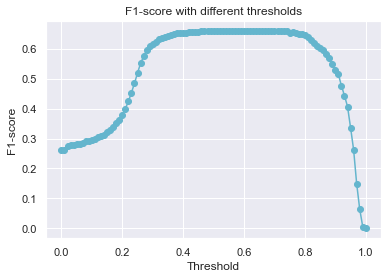

In [ ]:
clf = LogisticRegression(class_weight={0:1,1:5.6})
clf.fit(X_train_eng[set1_no_bin], y_train_df)

f1_scores = []
max_f1 = 0
best_threshold = 0
for i in arange(0, 1.01, 0.01):
      preds = np.where(clf.predict_proba(X_train_eng[set1_no_bin])[:,1] > i, 1, 0)
      f1_scores.append(f1_score(y_train_df, preds))
      print(f'F1-score with {i} threshold: {f1_score(y_train_df, preds)}')
      if f1_score(y_train_df, preds) > max_f1:
            max_f1 = f1_score(y_train_df, preds)
            best_threshold = i

print(f'Best F1-score: {max_f1} (with {best_threshold} threshold)')
plt.plot(arange(0,1.01,0.01), f1_scores, color ='c', marker='o')
plt.title('F1-score with different thresholds')
plt.xlabel('Threshold')
plt.ylabel('F1-score')


In [ ]:
clf = LogisticRegression(class_weight={0:1,1:5.6})
clf.fit(X_train_eng[set1_no_bin], y_train_df)
THRESHOLD = 0.68
preds = np.where(clf.predict_proba(X_test_eng[set1_no_bin])[:,1] > THRESHOLD, 1, 0)

In [ ]:
df_threshold = pd.DataFrame(preds)
df_threshold

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,0
2298,0


In [ ]:
df_threshold.value_counts()

0    2287
1      13
dtype: int64

In [ ]:
kaggle_log_threshold = pd.DataFrame(X_test_eng.index)
kaggle_log_threshold

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [ ]:
kaggle_log_threshold = pd.concat([kaggle_log_threshold["Access_ID"], df_threshold[0]],axis = 1)
kaggle_log_threshold["Buy"] = kaggle_log_threshold[0]
kaggle_log_threshold = kaggle_log_threshold.drop(columns = [0])
kaggle_log_threshold.set_index('Access_ID', inplace = True,drop = True)
kaggle_log_threshold

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,0


In [ ]:
kaggle_log_threshold = kaggle_log_threshold.astype(int)
file_name = 'kaggle_logistic_threshold.csv'
  
# saving the excel
kaggle_log_threshold.to_csv(file_name)

<hr>
<a class="anchor" id="SVM">
    
## Support Vector Machines 
    
</a>

### Aplicação básica

In [ ]:
# for i in range(len(sets)):
        
#     print(f'Scores using Set {i+1}')

#     svm_no_over = SVC().fit(X_train_eng[sets[i]], y_train_df)
    
#     predict_train_svm = svm_no_over.predict(X_train_eng[sets[i]])
#     predict_val_svm = svm_no_over.predict(X_val_eng[sets[i]])
    
    
#     metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

In [ ]:
# svm_no_over = SVC().fit(X_train_eng[set2], y_train_df)
# predict_train_svm = svm_no_over.predict(X_train_eng[set2])
# predict_val_svm = svm_no_over.predict(X_val_eng[set2])
 
# metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

In [ ]:
# labels_svm_basic = svm_no_over.predict(X_test_eng[set2])
# df_svm_basic = pd.DataFrame(labels_svm_basic)
# df_svm_basic

In [ ]:
# df_svm_basic.value_counts()

In [ ]:
# kaggle_svm_basic = pd.DataFrame(X_test_eng.index)
# kaggle_svm_basic

In [ ]:
# kaggle_svm_basic = pd.concat([kaggle_svm_basic["Access_ID"], df_svm_basic[0]],axis = 1)
# kaggle_svm_basic["Buy"] = kaggle_svm_basic[0]
# kaggle_svm_basic = kaggle_svm_basic.drop(columns = [0])
# kaggle_svm_basic.set_index('Access_ID', inplace = True,drop = True)
# kaggle_svm_basic

In [ ]:
# kaggle_svm_basic = kaggle_svm_basic.astype(int)
# file_name = 'kaggle_svm_no_over_default.csv'

# # saving the excel
# kaggle_svm_basic.to_csv(file_name)

### SVM with study of best kernel

In [ ]:
# kernel_type = ['linear', 'poly', 'rbf', 'sigmoid']

# for index, value in enumerate(kernel_type):
#     print('***********************************************************')
#     print(f'               Kernel choosen: {value}                    ')
#     print('***********************************************************')
#     for i in range(len(sets)):
        
#         print(f'Scores using Set {i+1}')

#         svm_no_over = SVC(kernel = value).fit(X_train_eng[sets[i]], y_train_df)
        
#         predict_train_svm = svm_no_over.predict(X_train_eng[sets[i]])
#         predict_val_svm = svm_no_over.predict(X_val_eng[sets[i]])
        
        
#         metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

Rbf seems to be the Kernel that gives us better results. Let's decide then what is the dataset with best results in this model, using kernel = 'Rbf'

In [ ]:
for i in range(len(sets)):
        
    print(f'Scores using Set {i+1}')

    svm_no_over = SVC(kernel = 'rbf',class_weight='balanced').fit(X_train_eng[sets[i]], y_train_df)
    
    predict_train_svm = svm_no_over.predict(X_train_eng[sets[i]])
    predict_val_svm = svm_no_over.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5698
           1       0.56      0.80      0.66      1010

    accuracy                           0.87      6708
   macro avg       0.76      0.85      0.79      6708
weighted avg       0.90      0.87      0.88      6708

Confusion Matrix:
[[5052  646]
 [ 197  813]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

Set2 seems to be the set of variables with better results

In [ ]:
# svm_no_over = SVC(kernel = 'rbf').fit(X_train_eng[set3], y_train_df)
# predict_train_svm = svm_no_over.predict(X_train_eng[set3])
# predict_val_svm = svm_no_over.predict(X_val_eng[set3])
 
# metrics1(y_train_df, predict_train_svm , y_val_df, predict_val_svm)

In [ ]:
# labels_svm = svm_no_over.predict(X_test_eng[set3])
# df_svm = pd.DataFrame(labels_svm)
# df_svm

In [ ]:
# roc_svm = roc_auc_score(y_val_df,  svm_no_over.predict(X_val_eng[set3]))
# roc_svm

In [ ]:
# df_svm.value_counts()

In [ ]:
# kaggle_svm = pd.DataFrame(X_test_eng.index)
# kaggle_svm

In [ ]:
# kaggle_svm = pd.concat([kaggle_svm["Access_ID"], df_svm[0]],axis = 1)
# kaggle_svm["Buy"] = kaggle_svm[0]
# kaggle_svm = kaggle_svm.drop(columns = [0])
# kaggle_svm.set_index('Access_ID', inplace = True,drop = True)
# kaggle_svm

In [ ]:
# kaggle_svm = kaggle_svm.astype(int)
# file_name = 'kaggle_svm_no_over_rbf.csv'

# # saving the excel
# kaggle_svm.to_csv(file_name)

#### Grid search for dataset with outliers

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(class_weight='balanced'),param_grid,refit=True,verbose=2,scoring=make_scorer(f1_score, average='binary'))

grid_result_out = grid.fit(X_train_out_robust[set1_no_bin], y_train_out)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result_out.best_score_, grid_result_out.best_params_))
# summarize all scores that were evaluated
means = grid_result_out.cv_results_['mean_test_score']
stds = grid_result_out.cv_results_['std_test_score']
params = grid_result_out.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.4s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.6s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.8s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.7s
[CV] END ...................C=0.1, gamma=0.1, k

In [ ]:
svm_out = SVC(class_weight='balanced',C= 10, gamma= 0.001, kernel='rbf',random_state=42).fit(X_train_out_robust[set1_no_bin], y_train_out)
metrics1(y_train_out, svm_out.predict(X_train_out_robust[set1_no_bin]) , y_val_out, svm_out.predict(X_val_out_robust[set1_no_bin]))
evaluate_model(svm_out,X_train_out_robust[set1_no_bin],y_train_out)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5760
           1       0.56      0.79      0.66      1037

    accuracy                           0.87      6797
   macro avg       0.76      0.84      0.79      6797
weighted avg       0.90      0.87      0.88      6797

Confusion Matrix:
[[5126  634]
 [ 218  819]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

(array([0.65637066, 0.67938931, 0.5917603 , 0.64748201, 0.67213115,
        0.6484375 , 0.62962963, 0.632     , 0.62068966, 0.704     ,
        0.688     , 0.6394052 , 0.63970588, 0.62204724, 0.6484375 ,
        0.65441176, 0.62790698, 0.62040816, 0.671875  , 0.65637066,
        0.68164794, 0.59591837, 0.62835249, 0.60836502, 0.61481481,
        0.656     , 0.66159696, 0.69230769, 0.66412214, 0.6798419 ]),
 array([0.84788996, 0.86798878, 0.80689103, 0.85977564, 0.84388355,
        0.83914263, 0.83834135, 0.82446737, 0.82636361, 0.87596919,
        0.86137821, 0.84488515, 0.84795673, 0.81817575, 0.83914263,
        0.85930823, 0.82605502, 0.81164037, 0.85931601, 0.85098941,
        0.875     , 0.79193376, 0.8291266 , 0.816039  , 0.82698985,
        0.83867521, 0.85576923, 0.87873348, 0.8598301 , 0.86192017]))

#### Grid search for dataset without outliers

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(class_weight='balanced'),param_grid,refit=True,verbose=2,scoring=make_scorer(f1_score, average='binary'))

grid_result = grid.fit(X_train_eng[set1_no_bin], y_train_df)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   2.1s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   2.2s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   2.5s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.9s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   1.7s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   1.5s
[CV] END ...................C=0.1, gamma=0.1, k

In [ ]:
svm = SVC(class_weight='balanced',C= 10, gamma= 0.1, kernel='rbf',random_state=42).fit(X_train_eng[set1_no_bin], y_train_df)
metrics1(y_train_df, svm.predict(X_train_eng[set1_no_bin]) , y_val_df, svm.predict(X_val_eng[set1_no_bin]))
evaluate_model(svm,X_train_eng,y_train_df)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      5698
           1       0.56      0.80      0.66      1010

    accuracy                           0.88      6708
   macro avg       0.76      0.84      0.79      6708
weighted avg       0.90      0.88      0.88      6708

Confusion Matrix:
[[5070  628]
 [ 205  805]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

(array([0.61157025, 0.5511811 , 0.59349593, 0.66115702, 0.62601626,
        0.63070539, 0.62835249, 0.576     , 0.5785124 , 0.62015504,
        0.57723577, 0.63157895, 0.6097561 , 0.6473029 , 0.59689922,
        0.65322581, 0.59607843, 0.59919028, 0.58687259, 0.62882096,
        0.65354331, 0.5952381 , 0.6023166 , 0.57894737, 0.64      ,
        0.62650602, 0.63414634, 0.59437751, 0.61538462, 0.57249071]),
 array([0.8075647 , 0.77372764, 0.79822824, 0.84253083, 0.821539  ,
        0.82009727, 0.83751954, 0.78889178, 0.7841445 , 0.82837704,
        0.78657287, 0.84478895, 0.80988362, 0.83175265, 0.81101268,
        0.84309536, 0.80781657, 0.80317874, 0.80418138, 0.8072265 ,
        0.84948758, 0.80462046, 0.81596318, 0.7732239 , 0.83551329,
        0.82473511, 0.82736668, 0.80142435, 0.8147262 , 0.80122327]))

In [ ]:
labels_svm_gs = svm.predict(X_test_eng[set1_no_bin])
df_svm_gs = pd.DataFrame(labels_svm_gs)
df_svm_gs

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,1
2298,0


In [ ]:
df_svm_gs.value_counts()

0    1973
1     327
dtype: int64

In [ ]:
kaggle_svm_gs = pd.DataFrame(X_test_eng.index)
kaggle_svm_gs

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [ ]:
kaggle_svm_gs = pd.concat([kaggle_svm_gs["Access_ID"], df_svm_gs[0]],axis = 1)
kaggle_svm_gs["Buy"] = kaggle_svm_gs[0]
kaggle_svm_gs = kaggle_svm_gs.drop(columns = [0])
kaggle_svm_gs.set_index('Access_ID', inplace = True,drop = True)
kaggle_svm_gs

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1


In [ ]:
kaggle_svm_gs = kaggle_svm_gs.astype(int)
file_name = 'kaggle_svm_no_over_gs.csv'

# saving the excel
kaggle_svm_gs.to_csv(file_name)

### KNN

In [ ]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Dropping unnecessary variables
knn_features = set3

knn_features.remove("during_covid")

#Oversampled X alteration       
X_train_over_knn = X_train_over[knn_features]
X_val_eng_knn = X_val_eng[knn_features]

#Non-oversampled X alteration
X_train_eng_knn = X_train_eng[knn_features]
X_val_eng_knn = X_val_eng[knn_features]

In [ ]:
#GridSearch for oversampled data

f1 = make_scorer(f1_score)

grid_params = {
    "n_neighbors": np.arange(1,16,2),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "brute", "ball_tree"],
    "metric": ["euclidean", "manhattan"],
    "leaf_size": [1,2,3,4,5,6,7,8]
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs= -1,
    scoring = f1,# scoring=make_scorer(f1_score, average='binary')
)

gs_results = gs.fit(X_train_over_knn, y_train_over)

print("****************************************************")
print(f"Best Score:{gs_results.best_score_}")
print("****************************************************")
print(f"Best Results:{gs_results.best_params_}")
print("****************************************************")
print(f"Scorer:{gs_results.scorer_}")

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
****************************************************
Best Score:0.8844134221197354
****************************************************
Best Results:{'algorithm': 'kd_tree', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
****************************************************
Scorer:make_scorer(f1_score)


In [ ]:
#GridSearch for non_oversampled data

from sklearn.model_selection import GridSearchCV

f1 = make_scorer(f1_score , average='binary')

grid_params = {
    "n_neighbors": np.arange(1,16,2),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "brute", "ball_tree"],
    "metric": ["euclidean", "manhattan"],
    "leaf_size": [1,2,3,4,5,6,7,8]
}

gs_1 = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv = 5,
    n_jobs= -1,
    scoring = f1
)

gs_1_results = gs_1.fit(X_train_eng_knn, y_train_df)

print("****************************************************")
print(f"Best Score:{gs_1_results.best_score_}")
print("****************************************************")
print(f"Best Results:{gs_1_results.best_params_}")
print("****************************************************")
print(f"Scorer:{gs_1_results.scorer_}")

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
****************************************************
Best Score:0.6366755936678967
****************************************************
Best Results:{'algorithm': 'kd_tree', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
****************************************************
Scorer:make_scorer(f1_score, average=binary)


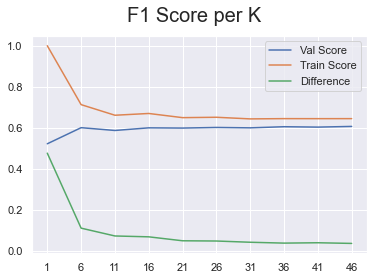

In [ ]:
#Creating model based on results from GridSearch

nKrange = np.arange(1,50,5)

val_score_list = []
train_score_list = []
difference_list = []

for k in nKrange:
    # instantiate the model
    knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=5, metric='euclidean',n_neighbors=k)

    # fit the model to the training set
    knn.fit(X_train_over_knn, y_train_over)

    #Predicting values
    y_pred_val = knn.predict(X_val_eng_knn)
    y_pred_train = knn.predict(X_train_eng_knn)

    #F1 Scores 
    val_score = f1_score(y_val_df, y_pred_val)
    train_score = f1_score(y_train_df, y_pred_train)
    difference = train_score - val_score

    #Appending to lists
    val_score_list.append(val_score)
    train_score_list.append(train_score)
    difference_list.append(difference)

fig = plt.figure()
fig.suptitle('F1 Score per K', fontsize=20)
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(nKrange, val_score_list, label = 'Val Score')
plt.plot(nKrange, train_score_list, label = 'Train Score')
plt.plot(nKrange, difference_list, label = "Difference")
plt.xticks(nKrange)
plt.legend()
plt.show()

In [ ]:
null_accuracy = (2436/(426+2436))
print(f"Null Accuracy Score: {round(null_accuracy,4)}")

Null Accuracy Score: 0.8512


In [ ]:
#Instantiating final model
final_knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=1, metric='manhattan',n_neighbors=26)

#Fitting model
final_knn.fit(X_train_over_knn, y_train_over)

#Creating prediction on validation set
y_pred_11 = final_knn.predict(X_val_eng_knn)

#Printing score
print("F1 Score: " + str(round(f1_score(y_val_df, y_pred_11),4)))


F1 Score: 0.6107


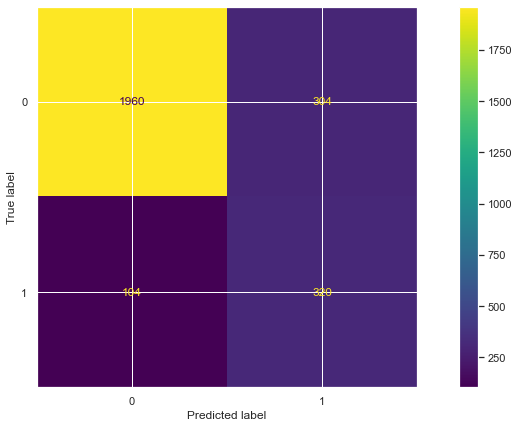

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_knn, X_val_eng_knn, y_val_df)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val_df, y_pred_11))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2264
           1       0.51      0.75      0.61       424

    accuracy                           0.85      2688
   macro avg       0.73      0.81      0.76      2688
weighted avg       0.88      0.85      0.86      2688



In [ ]:
#Changing threshold

predict_train_KNN_threshold = (final_knn.predict_proba(X_train_over_knn)[:,1] >= 0.7).astype(int)
predict_val_KNN_threshold = (final_knn.predict_proba(X_val_eng_knn)[:,1] >= 0.7).astype(int)

metrics1(y_train_over, predict_train_KNN_threshold , y_val_df, predict_val_KNN_threshold)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      5286
           1       0.91      0.80      0.85      5286

    accuracy                           0.86     10572
   macro avg       0.87      0.86      0.86     10572
weighted avg       0.87      0.86      0.86     10572

Confusion Matrix:
[[4883  403]
 [1043 4243]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
#Making predictions on the Test Data

labels_KNN = (final_knn.predict_proba(X_test_eng[set3])[:,1] >= 0.7).astype(int)
labels_KNN

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
labels_KNN_df = pd.DataFrame(labels_KNN)
labels_KNN_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,0
2298,0


In [ ]:
kaggle_KNN = pd.DataFrame(X_test_eng.index)
kaggle_KNN

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [ ]:
kaggle_KNN = pd.concat([kaggle_KNN["Access_ID"], labels_KNN_df[0]],axis=1)
kaggle_KNN["Buy"] = kaggle_KNN[0]
kaggle_KNN = kaggle_KNN.drop(columns=[0])

In [ ]:
kaggle_KNN.set_index('Access_ID',inplace=True,drop=True)

In [ ]:
kaggle_KNN=kaggle_KNN.astype(int)
kaggle_KNN

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,0


In [ ]:
kaggle_KNN.to_csv("kaggleKNN.csv")

In [ ]:
adaboost - FILIPA
gradient bosting classifier - LEO
StackingClassifier - DANIEL
VotingClassifier - HELENA

comparing scales - KNN;LOG - leonor - (neural networks part 1)

<hr>
<a class="anchor" id="ADABOOST">
    
## Adaboost 
    
</a>

In [190]:
for i in range(len(sets)):
        
    print(f'Scores using Set {i+1}')

    adaboost_no_over = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(X_train_eng[sets[i]], y_train_df)
    
    predict_train_adaboost = adaboost_no_over.predict(X_train_eng[sets[i]])
    predict_val_adaboost = adaboost_no_over.predict(X_val_eng[sets[i]])
    
    
    metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)


Scores using Set 1
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5286
           1       0.65      0.60      0.62      1008

    accuracy                           0.88      6294
   macro avg       0.79      0.77      0.78      6294
weighted avg       0.88      0.88      0.88      6294

Confusion Matrix:
[[4963  323]
 [ 408  600]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------

In [191]:
adaboost_no_over = AdaBoostClassifier(n_estimators=50, learning_rate=1).fit(X_train_eng[set2], y_train_df)
predict_train_adaboost = adaboost_no_over.predict(X_train_eng[set2])
predict_val_adaboost = adaboost_no_over.predict(X_val_eng[set2])

metrics1(y_train_df, predict_train_adaboost , y_val_df, predict_val_adaboost)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      5286
           1       0.66      0.61      0.64      1008

    accuracy                           0.89      6294
   macro avg       0.79      0.78      0.78      6294
weighted avg       0.88      0.89      0.89      6294

Confusion Matrix:
[[4965  321]
 [ 389  619]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [192]:
labels_adaboost = adaboost_no_over.predict(X_test_eng[set2])
df_adaboost = pd.DataFrame(labels_adaboost)
df_adaboost

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,0
2298,0


In [193]:
roc_adaboost = roc_auc_score(y_val_df,  adaboost_no_over.predict(X_val_eng[set2]))
roc_adaboost

0.7645593039535968

In [194]:
df_adaboost.value_counts()

0    2129
1     171
dtype: int64

In [195]:
kaggle_adaboost = pd.DataFrame(X_test_eng.index)
kaggle_adaboost

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [196]:
kaggle_adaboost = pd.concat([kaggle_adaboost["Access_ID"], df_adaboost[0]],axis = 1)
kaggle_adaboost["Buy"] = kaggle_adaboost[0]
kaggle_adaboost = kaggle_adaboost.drop(columns = [0])
kaggle_adaboost.set_index('Access_ID', inplace = True,drop = True)
kaggle_adaboost

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,0


In [197]:
kaggle_adaboost = kaggle_adaboost.astype(int)
file_name = 'kaggle_adaboost_no_over.csv'

# saving the excel
kaggle_adaboost.to_csv(file_name)

#### Exploring the number of trees in Adaboost (n_estimates)

F1 score: 0.607 (0.047)
ROC_AUC score: 0.762 (0.035)
>10 0.607 (0.047)
F1 score: 0.614 (0.035)
ROC_AUC score: 0.761 (0.022)
>50 0.614 (0.035)
F1 score: 0.607 (0.035)
ROC_AUC score: 0.756 (0.023)
>100 0.607 (0.035)
F1 score: 0.598 (0.038)
ROC_AUC score: 0.750 (0.026)
>500 0.598 (0.038)
F1 score: 0.596 (0.041)
ROC_AUC score: 0.749 (0.027)
>1000 0.596 (0.041)
F1 score: 0.582 (0.036)
ROC_AUC score: 0.739 (0.023)
>5000 0.582 (0.036)


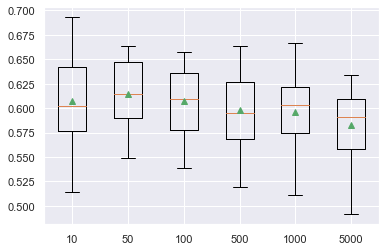

In [201]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set2], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

n_estimates = 50 seems to be the optimal

#### Exploring the weak learner in Adaboost (base_estimator)

>1 0.595 (0.047)
>2 0.588 (0.055)
>3 0.572 (0.043)
>4 0.561 (0.036)
>5 0.534 (0.043)
>6 0.544 (0.051)
>7 0.568 (0.045)
>8 0.571 (0.046)
>9 0.579 (0.037)
>10 0.577 (0.046)


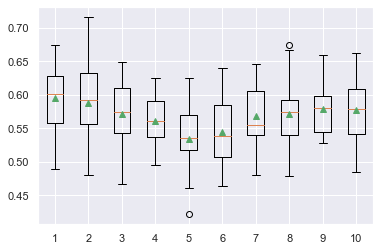

In [ ]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set2], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

base_estimator = 2 seems to be optimal

#### Exploring the Learning Rate in Adaboost (learning_rate)

>0.100 0.888 (0.012)
>0.200 0.888 (0.012)
>0.300 0.888 (0.013)
>0.400 0.887 (0.014)
>0.500 0.887 (0.013)
>0.600 0.889 (0.013)
>0.700 0.887 (0.013)
>0.800 0.885 (0.012)
>0.900 0.886 (0.014)
>1.000 0.885 (0.014)
>1.100 0.886 (0.013)
>1.200 0.885 (0.014)
>1.300 0.886 (0.014)
>1.400 0.885 (0.015)
>1.500 0.886 (0.013)
>1.600 0.887 (0.012)
>1.700 0.885 (0.012)
>1.800 0.885 (0.013)
>1.900 0.883 (0.012)
>2.000 0.124 (0.015)


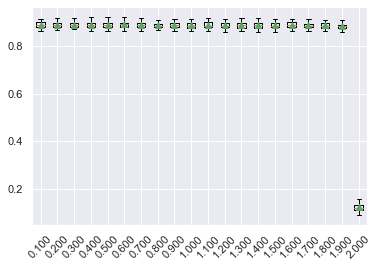

In [ ]:
from numpy import arange
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1)
	return scores
 
# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng[set2], y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

learning_rate = 0.6 seems to be optimal

#### Explore Alternate Algorithm (base_estimator)

In [ ]:
model = AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced_subsample'))
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_eng[set2], y_train_df, scoring=make_scorer(f1_score, average='binary'), cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.877 (0.007)


### GridSearch

In [202]:
clf = AdaBoostClassifier(SVC(kernel='rbf',probability=True),n_estimators=10,  learning_rate=1.0, algorithm='SAMME.R')

In [203]:
model = AdaBoostClassifier(algorithm='SAMME.R', random_state = 42)
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100, 200]
grid['learning_rate'] = [0.001, 0.01, 0.1, 0.5, 0.6, 0.8]
grid['base_estimator'] = [SVC(class_weight='balanced',C= 10, gamma= 0.001, kernel='rbf'), DecisionTreeClassifier(splitter = 'random', min_samples_split=450,class_weight={0:1,1:5.6}, criterion='gini'), RandomForestClassifier(n_estimators=20,class_weight='balanced_subsample',criterion="gini", max_features=None, min_samples_leaf=500)]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(f1_score, average='binary'))
# execute the grid search
grid_result = grid_search.fit(X_train_eng[set1_no_bin], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.666478 using {'base_estimator': RandomForestClassifier(class_weight='balanced_subsample', max_features=None,
                       min_samples_leaf=500, n_estimators=20), 'learning_rate': 0.1, 'n_estimators': 50}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.001, 'n_estimators': 50}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.001, 'n_estimators': 100}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.001, 'n_estimators': 200}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.01, 'n_estimators': 50}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.01, 'n_estimators': 100}
nan (nan) with: {'base_estimator': SVC(C=10, class_weight='balanced', gamma=0.001), 'learning_rate': 0.01, 'n_estimators': 200}
nan (nan)

In [ ]:
adaboost_test = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01).fit(X_train_eng[set2], y_train_df)
predict_train_adaboost1 = adaboost_test.predict(X_train_eng[set2])
predict_val_adaboost1 = adaboost_test.predict(X_val_eng[set2])

metrics1(y_train_df, predict_train_adaboost1 , y_val_df, predict_val_adaboost1)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5698
           1       0.64      0.66      0.65      1010

    accuracy                           0.89      6708
   macro avg       0.79      0.80      0.79      6708
weighted avg       0.89      0.89      0.89      6708

Confusion Matrix:
[[5318  380]
 [ 343  667]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
labels_adaboost_gs = adaboost_test.predict(X_test_eng[set2])
df_adaboost_gs = pd.DataFrame(labels_adaboost_gs)
df_adaboost_gs

,0
0,0
1,0
2,0
3,0
4,0
...,...
2295,0
2296,0
2297,1
2298,0


In [ ]:
roc_adaboost_gs = roc_auc_score(y_val_df, adaboost_test.predict(X_val_eng[set2]))
roc_adaboost_gs

0.7929762482943639

In [ ]:
df_adaboost_gs.value_counts()

0    1958
1     342
dtype: int64

In [ ]:
kaggle_adaboost_gs = pd.DataFrame(X_test_eng.index)
kaggle_adaboost_gs

,Access_ID
0,798519314
1,798663101
2,798663221
3,798760918
4,798856982
...,...
2295,962042726
2296,962063064
2297,962147749
2298,962182167


In [ ]:
kaggle_adaboost_gs = pd.concat([kaggle_adaboost_gs["Access_ID"], df_adaboost_gs[0]],axis = 1)
kaggle_adaboost_gs["Buy"] = kaggle_adaboost_gs[0]
kaggle_adaboost_gs = kaggle_adaboost_gs.drop(columns = [0])
kaggle_adaboost_gs.set_index('Access_ID', inplace = True,drop = True)
kaggle_adaboost_gs

,Buy
Access_ID,
798519314,0
798663101,0
798663221,0
798760918,0
798856982,0
...,...
962042726,0
962063064,0
962147749,1


In [ ]:
kaggle_adaboost_gs = kaggle_adaboost_gs.astype(int)
file_name = 'kaggle_adaboost_gs_no_over.csv'

# saving the excel
kaggle_adaboost_gs.to_csv(file_name)

## Gradient Boost

### Exploring number of samples


>0.1 0.888 (0.011)
>0.2 0.894 (0.011)
>0.3 0.897 (0.010)
>0.4 0.898 (0.011)
>0.5 0.898 (0.010)
>0.6 0.898 (0.010)
>0.7 0.899 (0.010)
>0.8 0.898 (0.011)
>0.9 0.898 (0.010)
>1.0 0.899 (0.010)


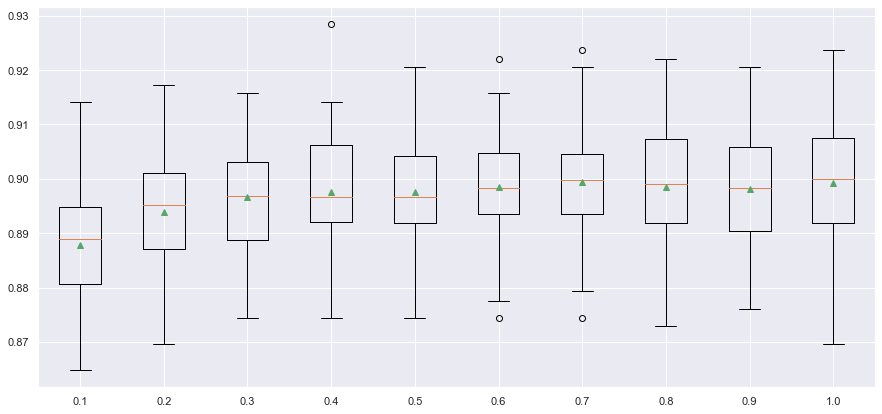

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore sample ratio from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng, y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()



#### Exploring number of features


1 0.8935 0.0117
2 0.8939 0.0119
3 0.8947 0.0123
4 0.8937 0.0118
5 0.8939 0.0109
6 0.8932 0.0111


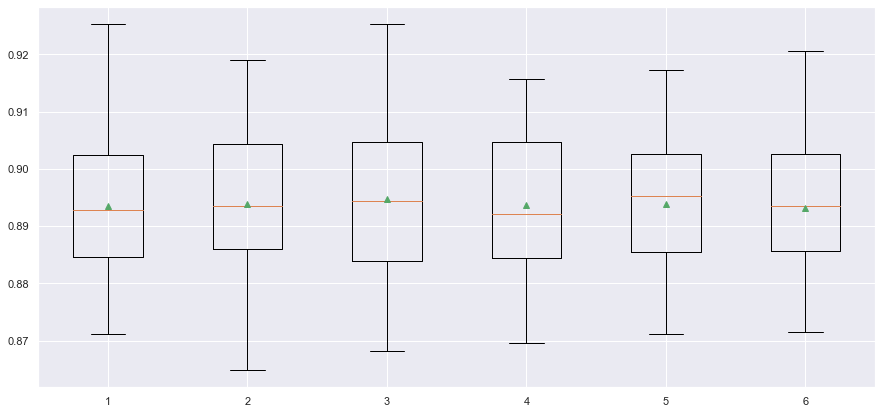

In [ ]:
def get_models(X_data):
    models = dict()
    for i in np.arange(1,len(X_data.columns),1):
        models[str(i)] = GradientBoostingClassifier(max_features=i)
    return models

def evaluator(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats= 5, random_state=42)
    scores = cross_val_score(model,X,y, scoring = "accuracy", cv = cv, n_jobs = -1)
    return scores

models = get_models(X_train_eng[set3])

results, names = list(), list()

for name, model in models.items():
    scores = evaluator(model, X_train_eng[set3], y_train_df)
    results.append(scores)
    names.append(name)

    print(f"{name} {round(mean(scores),4)} {round(std(scores),4)}")

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


#### Exploring Learning Rate


>0.0001 0.840 (0.001)
>0.0010 0.840 (0.001)
>0.0100 0.888 (0.008)
>0.1000 0.900 (0.011)
>1.0000 0.879 (0.012)


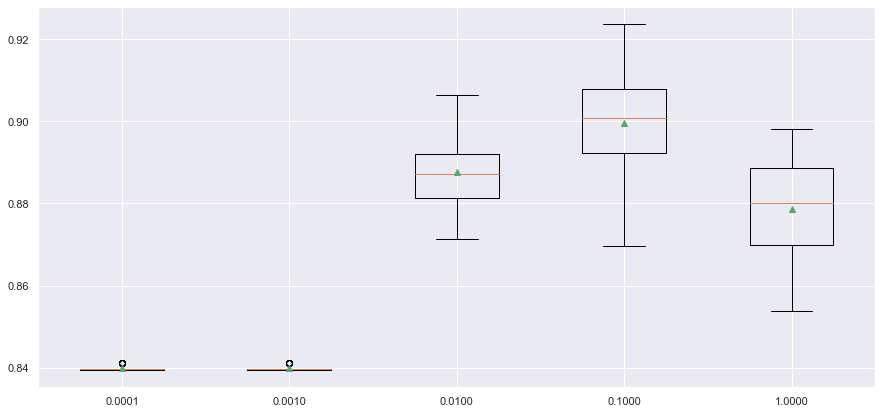

In [ ]:
def get_models():
	models = dict()
	# define learning rates to explore
	for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % i
		models[key] = GradientBoostingClassifier(learning_rate=i)
	return models

def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X_train_eng, y_train_df, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_test_eng, y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


#### Exploring Max Depth of Trees


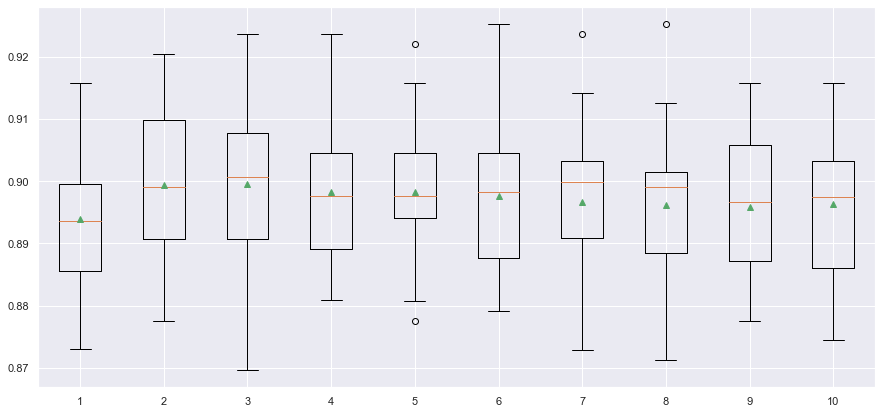

In [ ]:
def get_models():
	models = dict()
	# define max tree depths to explore between 1 and 10
	for i in range(1,11):
		models[str(i)] = GradientBoostingClassifier(max_depth=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X_train_eng, y_train_df, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train_eng, y_train_df)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	#print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### GridSearch

In [ ]:
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500, 750, 1000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
grid['']
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_eng[set2], y_train_df)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: name 'GradientBoostingClassifier' is not defined

*Best: 0.905435 using {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}*

#### Fitting and Scoring

In [ ]:
#Initialising model with optimised parameters
gradientbooster = GradientBoostingClassifier(learning_rate=0.01,max_depth=7,n_estimators=500,subsample=0.7)

#Fitting model
gradientbooster.fit(X_train_eng[set2],y_train_df)

#Setting up cross-validation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=5, random_state=42)

score = cross_val_score(gradientbooster, X_train_eng[set2], y_train_df, scoring = "f1", cv = cv, n_jobs=-1)

print(mean(score), std(score))
predict_train_gradient_boost = gradientbooster.predict(X_train_eng[set2])
predict_val_gradient_boost = gradientbooster.predict(X_val_eng[set2])

metrics1(y_train_df, predict_train_gradient_boost , y_val_df, predict_val_gradient_boost)

0.618503073577626 0.04157406502965789
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5286
           1       0.96      0.80      0.87      1008

    accuracy                           0.96      6294
   macro avg       0.96      0.90      0.93      6294
weighted avg       0.96      0.96      0.96      6294

Confusion Matrix:
[[5254   32]
 [ 200  808]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------

#### OverSampling

In [ ]:
model = GradientBoostingClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500, 750, 1000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1')
# execute the grid search
grid_result = grid_search.fit(X_train_over[set2], y_train_over)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: name 'GradientBoostingClassifier' is not defined

#### Fitting and Scoring

In [ ]:
#Initialising model with optimised parameters
gradientbooster = GradientBoostingClassifier(learning_rate=0.01,max_depth=7,n_estimators=500,subsample=0.7, random_state=42)

#Fitting model
gradientbooster.fit(X_train_over[set2],y_train_over)

#Setting up cross-validation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=5, random_state=42)

score = cross_val_score(gradientbooster, X_train_over[set2], y_train_over, scoring = "f1", cv = cv, n_jobs=-1)

np.mean(score)

0.8907827518193697

#### Predicting and Scoring

In [ ]:
predict_train_gradient_boost = gradientbooster.predict(X_train_over[set2])
predict_val_gradient_boost = gradientbooster.predict(X_val_eng[set2])

metrics1(y_train_over, predict_train_gradient_boost , y_val_df, predict_val_gradient_boost)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      5286
           1       0.94      0.91      0.92      5286

    accuracy                           0.92     10572
   macro avg       0.92      0.92      0.92     10572
weighted avg       0.92      0.92      0.92     10572

Confusion Matrix:
[[4951  335]
 [ 464 4822]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
#Changing threshold

predict_train_gradient_boost_threshold = (gradientbooster.predict_proba(X_train_over[set2])[:,1] >= 0.6).astype(int)
predict_val_gradient_boost_threshold = (gradientbooster.predict_proba(X_val_eng[set2])[:,1] >= 0.6).astype(int)

metrics1(y_train_over, predict_train_gradient_boost_threshold , y_val_df, predict_val_gradient_boost_threshold)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5286
           1       0.95      0.89      0.92      5286

    accuracy                           0.92     10572
   macro avg       0.93      0.92      0.92     10572
weighted avg       0.93      0.92      0.92     10572

Confusion Matrix:
[[5051  235]
 [ 576 4710]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

In [ ]:
#Preparing for kaggle

labels_Gradient_Boost = (gradientbooster.predict_proba(X_test_eng[set2])[:,1] >= 0.6).astype(int)
labels_Gradient_Boost_df = pd.DataFrame(labels_Gradient_Boost)
kaggle_gradient_boost = pd.DataFrame(X_test_eng.index)
kaggle_gradient_boost = pd.concat([kaggle_gradient_boost["Access_ID"], labels_Gradient_Boost_df[0]],axis = 1)
kaggle_gradient_boost["Buy"] = kaggle_gradient_boost[0]
kaggle_gradient_boost = kaggle_gradient_boost.drop(columns = [0])
kaggle_gradient_boost.set_index("Access_ID", inplace = True, drop = True)
kaggle_gradient_boost = kaggle_gradient_boost.astype(int)
kaggle_gradient_boost
#Saving to csv
kaggle_gradient_boost.to_csv("gradient_boost.csv")